DEEP LEARNING ASSIGNMENT 1



In [1]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# Display plots inline and change default figure size
%matplotlib inline

In [2]:
# Use pandas to read the CSV file as a dataframe
df_moons = pd.read_csv("moons500.csv")
#print(df_moons.sample(n=1, replace=True))

df_blobs = pd.read_csv("blobs400.csv")

# The y values are those labelled 'Class': extract their values
y_moons = df_moons['Class'].values

y_blobs = df_blobs['Class'].values

# The x values are all other columns
del df_moons['Class']   # drop the 'Class' column from the dataframe
X_moons = df_moons.values     # convert the remaining columns to a numpy array

del df_blobs['Class']   # drop the 'Class' column from the dataframe
X_blobs = df_blobs.values

In [3]:
df_moons.head() # moons dataset
#df_moons.sample(frac=1)

,X1,X2
0,0.391199,0.014889
1,0.870921,-0.540914
2,0.905689,0.572736
3,0.469162,0.543559
4,2.095047,0.049204


In [4]:
df_moons.shape

(500, 2)

In [5]:
df_blobs.shape

(400, 3)

In [6]:
# Some examples of working with the data, to look at rows/columns
print ("len(X_moons):", len(X_moons))            # outer array: one per sample
print ("len(X_moons[0]):", len(X_moons[0]))      # each inner array is the attributes of one sample
print ("len(X_moons[:,0]):", len(X_moons[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X_moons)
print ("X_moons: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y_moons)", len(y_moons))
print ("np.shape(y_moons):", np.shape(y_moons))

# You can transpose the y data using 'reshape'
yt_moons = np.reshape(y_moons, (len(y_moons),1))  
print ("np.shape(yt_moons):", np.shape(yt_moons))
(nsamples, nattribs) = np.shape(yt_moons)
print ("yt_moons transpose: nsamples =", nsamples, ", nattribs =", nattribs)

# You can transpose the y data using 'reshape'
#yt = np.reshape(y, (len(y),1))  
#print ("np.shape(yt):", np.shape(yt))
#(nsamples, nattribs) = np.shape(yt)
#print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X_moons): 500
len(X_moons[0]): 2
len(X_moons[:,0]): 500
X_moons: nsamples = 500 , nattribs = 2
len(y_moons) 500
np.shape(y_moons): (500,)
np.shape(yt_moons): (500, 1)
yt_moons transpose: nsamples = 500 , nattribs = 1


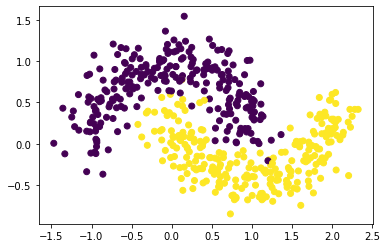

In [7]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X_moons[:,0], X_moons[:,1], c = y_moons)

In [8]:
# Some examples of working with the data, to look at rows/columns
print ("len(X_blobs):", len(X_blobs))            # outer array: one per sample
print ("len(X_blobs[0]):", len(X_blobs[0]))      # each inner array is the attributes of one sample
print ("len(X_blobs[:,0]):", len(X_blobs[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X_blobs)
print ("X_blobs: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y_blobs)", len(y_blobs))
print ("np.shape(y_blobs):", np.shape(y_blobs))

# You can transpose the y data using 'reshape'
yt_blobs = np.reshape(y_blobs, (len(y_blobs),1))  
print ("np.shape(yt_blobs):", np.shape(yt_blobs))
(nsamples, nattribs) = np.shape(yt_blobs)
print ("yt_blobs transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X_blobs): 400
len(X_blobs[0]): 3
len(X_blobs[:,0]): 400
X_blobs: nsamples = 400 , nattribs = 3
len(y_blobs) 400
np.shape(y_blobs): (400,)
np.shape(yt_blobs): (400, 1)
yt_blobs transpose: nsamples = 400 , nattribs = 1


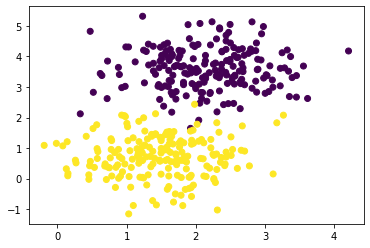

In [9]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X_blobs[:,0], X_blobs[:,1], c = y_blobs)

In [10]:
###############################################################################################################################

# Part 1: Implement Logistic Regression

In [11]:
import numpy as np

class LogisticRegressionSGD():
    def __init__(self, learning_rate, num_epochs, batch_size): 
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.weights = None  # Initialize the weights and bias 
        self.bias = None
        self.error = []
        
    def fit(self, X, y, x_val , y_val):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        for epoch in range(self.num_epochs):
            error_epoch = 0
            for batch_start in range(0, num_samples, self.batch_size):
                batch_end = batch_start + self.batch_size
                X_batch = X[batch_start:batch_end]
                y_batch = y[batch_start:batch_end]
                y_pred = self.sigmoid(np.dot(X_batch, self.weights))
                error = y_batch - y_pred
                dw_gradient = np.dot(X_batch.T, error) / self.batch_size
                db_gradient = np.sum(error)
                self.weights += self.learning_rate * dw_gradient
                self.bias += self.learning_rate * db_gradient
                error_epoch += error 
                self.error.append(1/len(X)*error_epoch)
            pred = self.predict(x_val)
            print("Epoch :", epoch," Validation accuracy", np.round(accuracy_score(pred, y_val),2))

    def predict(self, X):
        if self.weights is None:
            raise Exception("Model not trained yet")
        y_pred = self.sigmoid(np.dot(X, self.weights))
        return np.round(y_pred)

    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))

In [12]:
from sklearn.model_selection import train_test_split

# Part 1 : Explanation

- Brief description of algorithm, including references to sources used.

A sigmoid activation function is used in a single neuron in a logistic regression neural network. It is a binary classification algorithm used in machine learning to predict the likelihood of an event occurring based on a set of input features.
The inputs are multiplied by weights, summed, and then passed through the sigmoid activation function, which squashes the output to a value between 0 and 1. This output represents the positive class's predicted probability.
Batch is used during training to adjust the weights and bias in order to minimize the cost function, which measures the difference between the predicted probabilities and the actual class labels. The gradient of the cost function with respect to the weights and bias is computed using backpropagation.
Logistic regression is a simple yet effective algorithm that can be trained quickly and easily. However, it is limited to linear decision boundaries and cannot capture complex non-linear relationships between input features and output. For more complex problems, more advanced neural network architectures such as multi-layer perceptrons or convolutional neural networks may be required.


In [13]:
################################################################################################################################

In [14]:
################################################################################################################################

# Part 2: Easy Tasks
For Moons:

Moons dataset: train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.

In [15]:
# Code to read in a dataset with variable number of 
# training cases and attributes, and divide it into a training set, validation set and testing set.

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=1 - train_ratio, 
                                                                            random_state=100)

X_train_moons.shape

(349, 2)

In [16]:
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val_moons, X_test_moons, y_val_moons, y_test_moons = train_test_split(X_test_moons, y_test_moons, test_size=
                                                                        test_ratio/(test_ratio + validation_ratio))

X_val_moons.shape, y_val_moons.shape

((75, 2), (75,))

In [17]:
lr = LogisticRegressionSGD(0.1, 100, 1)

In [18]:
from sklearn.metrics import accuracy_score
lr.fit(X_train_moons, y_train_moons, X_val_moons, y_val_moons) # model fitted on X_train and y_train

Epoch : 0  Validation accuracy 0.85
Epoch : 1  Validation accuracy 0.88
Epoch : 2  Validation accuracy 0.88
Epoch : 3  Validation accuracy 0.88
Epoch : 4  Validation accuracy 0.88
Epoch : 5  Validation accuracy 0.88
Epoch : 6  Validation accuracy 0.89
Epoch : 7  Validation accuracy 0.89
Epoch : 8  Validation accuracy 0.89
Epoch : 9  Validation accuracy 0.89
Epoch : 10  Validation accuracy 0.89
Epoch : 11  Validation accuracy 0.89
Epoch : 12  Validation accuracy 0.89
Epoch : 13  Validation accuracy 0.89
Epoch : 14  Validation accuracy 0.89
Epoch : 15  Validation accuracy 0.89
Epoch : 16  Validation accuracy 0.89
Epoch : 17  Validation accuracy 0.89
Epoch : 18  Validation accuracy 0.89
Epoch : 19  Validation accuracy 0.89
Epoch : 20  Validation accuracy 0.89
Epoch : 21  Validation accuracy 0.89
Epoch : 22  Validation accuracy 0.89
Epoch : 23  Validation accuracy 0.89
Epoch : 24  Validation accuracy 0.89
Epoch : 25  Validation accuracy 0.89
Epoch : 26  Validation accuracy 0.89
Epoch : 27 

In [19]:
test_pred_moons = lr.predict(X_test_moons)
#val_pred_moons = p.predict(X_val_moons)

In [20]:
test_pred_moons = lr.predict(X_test_moons)

#pred_moons = test_pred_moons.astype(int)

pred_moons = np.array(test_pred_moons, dtype=np.int64)

In [21]:
y_test_moons

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [22]:
test_pred_moons

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1.])

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_moons, pred_moons)

0.8552631578947368

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_moons, pred_moons))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.89      0.83      0.86        41

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [25]:
#x = np.linspace(-6, 6)
#y = activation_function(x)

#plt.plot(x, y, color="skyblue")
#plt.xlabel("$x$"); plt.ylabel("$S(x)$")
#plt.show()

In [26]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test_moons, pred_moons)

In [27]:
#import matplotlib.pyplot as plt

# Assume that we have stored the loss values at each epoch in a list called "losses"
#epochs = range(1, len(losses) + 1)

#plt.plot(epochs, losses, 'bo', label='Training loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.title('Training loss vs. Number of Epochs')
#plt.legend()
#plt.show()

In [28]:
################################################################################################################################

# 
For Blobs:

Blobs dataset: train the logistic regressor, use the validation set if needed, and test on the test set. Present results and observations on them.

In [29]:
# Reference to be attached in googls chats 
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, test_size=1 - train_ratio)

X_train_blobs.shape 

(279, 3)

In [30]:
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val_blobs, X_test_blobs, y_val_blobs, y_test_blobs = train_test_split(X_test_blobs, y_test_blobs, test_size=
                                                                        test_ratio/(test_ratio + validation_ratio), random_state=100)

X_val_blobs.shape, y_val_blobs.shape

((60, 3), (60,))

In [31]:
lr = LogisticRegressionSGD(0.001, 100, 1)

In [32]:
lr.fit(X_train_blobs, y_train_blobs, X_val_blobs, y_val_blobs) # model fitted on X_train and y_train

Epoch : 0  Validation accuracy 0.55
Epoch : 1  Validation accuracy 0.62
Epoch : 2  Validation accuracy 0.67
Epoch : 3  Validation accuracy 0.73
Epoch : 4  Validation accuracy 0.77
Epoch : 5  Validation accuracy 0.82
Epoch : 6  Validation accuracy 0.87
Epoch : 7  Validation accuracy 0.87
Epoch : 8  Validation accuracy 0.87
Epoch : 9  Validation accuracy 0.87
Epoch : 10  Validation accuracy 0.87
Epoch : 11  Validation accuracy 0.87
Epoch : 12  Validation accuracy 0.88
Epoch : 13  Validation accuracy 0.92
Epoch : 14  Validation accuracy 0.93
Epoch : 15  Validation accuracy 0.93
Epoch : 16  Validation accuracy 0.93
Epoch : 17  Validation accuracy 0.93
Epoch : 18  Validation accuracy 0.93
Epoch : 19  Validation accuracy 0.93
Epoch : 20  Validation accuracy 0.93
Epoch : 21  Validation accuracy 0.93
Epoch : 22  Validation accuracy 0.93
Epoch : 23  Validation accuracy 0.93
Epoch : 24  Validation accuracy 0.93
Epoch : 25  Validation accuracy 0.95
Epoch : 26  Validation accuracy 0.95
Epoch : 27 

In [33]:
test_pred_blobs = lr.predict(X_test_blobs)
#pred_blobs = test_pred_blobs.astype(int)

pred_blobs = np.array(test_pred_blobs, dtype=np.int64)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_blobs, pred_blobs)

0.9180327868852459

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_blobs, pred_blobs))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.96      0.86      0.91        29

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [36]:
################################################################################################################################

# Part 3: Implement and Test a Shallow Neural Network

In [37]:
import numpy as np

class ShallowNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01 # weights for hidden layer
        self.b1 = np.zeros((hidden_size, 1)) # bias for hidden layer
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01 # weights for output layer
        self.b2 = np.zeros((output_size, 1)) # bias for output layer

    def sigmoid(self, Z):
        A = 1/(1+np.exp(-Z))
        return A
    
    def sigmoid_der(self, Z):
        return sigmoid(Z) * (1-sigmoid(Z))
    
    def forward(self, X):
        self.Z1 = np.dot(self.W1, X.T) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2
    
    def mse(self,y_true, y_pred):
        return np.mean(np.power(y_true-y_pred, 2))
    
    #def cost(self, Y):
    #    m = Y.shape[1]
    #    cost = (-1/m) * np.sum(Y*np.log(self.A2) + (1-Y)*np.log(1-self.A2))
    #    return cost

    def backward(self, X, Y):
        m = X.shape[1]
        dZ2 = self.A2 - Y
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(self.W2.T, dZ2) * self.A1 * (1-self.A1)
        dW1 = (1/m) * np.dot(dZ1, X)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    def train(self, X, Y, X_val, Y_val, epochs, learning_rate):
        for i in range(epochs):
            self.forward(X)
            #mse = self.mse(y_true, y_pred)
            dW1, db1, dW2, db2 = self.backward(X, Y)
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            
            pred = self.predict(X_val)
            print("Epoch: ", i, "Error: ", accuracy_score(pred.T, Y_val))
            

    def predict(self, X):
        A = self.forward(X)
        predictions = np.round(A)
        return predictions

# 
MOONS:

In [38]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=1 - train_ratio, 
                                                                            random_state=100)


In [39]:
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val_moons, X_test_moons, y_val_moons, y_test_moons = train_test_split(X_test_moons, y_test_moons, test_size=
                                                                        test_ratio/(test_ratio + validation_ratio))
X_val_moons.shape, y_val_moons.shape

((75, 2), (75,))

In [40]:
nn = ShallowNeuralNetwork(2, 10, 1)

In [41]:
nn.train(X_train_moons, y_train_moons,X_val_moons, y_val_moons, 10000, 0.001)

Epoch:  0 Error:  0.4533333333333333
Epoch:  1 Error:  0.4533333333333333
Epoch:  2 Error:  0.4533333333333333
Epoch:  3 Error:  0.4533333333333333
Epoch:  4 Error:  0.4533333333333333
Epoch:  5 Error:  0.4533333333333333
Epoch:  6 Error:  0.4533333333333333
Epoch:  7 Error:  0.4533333333333333
Epoch:  8 Error:  0.4533333333333333
Epoch:  9 Error:  0.4533333333333333
Epoch:  10 Error:  0.4533333333333333
Epoch:  11 Error:  0.4533333333333333
Epoch:  12 Error:  0.4533333333333333
Epoch:  13 Error:  0.4533333333333333
Epoch:  14 Error:  0.4533333333333333
Epoch:  15 Error:  0.4533333333333333
Epoch:  16 Error:  0.4533333333333333
Epoch:  17 Error:  0.4533333333333333
Epoch:  18 Error:  0.4533333333333333
Epoch:  19 Error:  0.4533333333333333
Epoch:  20 Error:  0.4533333333333333
Epoch:  21 Error:  0.4533333333333333
Epoch:  22 Error:  0.4533333333333333
Epoch:  23 Error:  0.4533333333333333
Epoch:  24 Error:  0.4533333333333333
Epoch:  25 Error:  0.4533333333333333
Epoch:  26 Error:  0.4

Epoch:  385 Error:  0.7466666666666667
Epoch:  386 Error:  0.7466666666666667
Epoch:  387 Error:  0.7466666666666667
Epoch:  388 Error:  0.7466666666666667
Epoch:  389 Error:  0.7466666666666667
Epoch:  390 Error:  0.7466666666666667
Epoch:  391 Error:  0.7466666666666667
Epoch:  392 Error:  0.7466666666666667
Epoch:  393 Error:  0.7466666666666667
Epoch:  394 Error:  0.7466666666666667
Epoch:  395 Error:  0.7466666666666667
Epoch:  396 Error:  0.7466666666666667
Epoch:  397 Error:  0.7466666666666667
Epoch:  398 Error:  0.7466666666666667
Epoch:  399 Error:  0.7466666666666667
Epoch:  400 Error:  0.7466666666666667
Epoch:  401 Error:  0.7466666666666667
Epoch:  402 Error:  0.7466666666666667
Epoch:  403 Error:  0.7466666666666667
Epoch:  404 Error:  0.7466666666666667
Epoch:  405 Error:  0.7466666666666667
Epoch:  406 Error:  0.7466666666666667
Epoch:  407 Error:  0.7466666666666667
Epoch:  408 Error:  0.7466666666666667
Epoch:  409 Error:  0.7466666666666667
Epoch:  410 Error:  0.746

Epoch:  646 Error:  0.8266666666666667
Epoch:  647 Error:  0.8266666666666667
Epoch:  648 Error:  0.8266666666666667
Epoch:  649 Error:  0.84
Epoch:  650 Error:  0.84
Epoch:  651 Error:  0.84
Epoch:  652 Error:  0.84
Epoch:  653 Error:  0.84
Epoch:  654 Error:  0.84
Epoch:  655 Error:  0.84
Epoch:  656 Error:  0.8533333333333334
Epoch:  657 Error:  0.8533333333333334
Epoch:  658 Error:  0.8533333333333334
Epoch:  659 Error:  0.8533333333333334
Epoch:  660 Error:  0.8533333333333334
Epoch:  661 Error:  0.8533333333333334
Epoch:  662 Error:  0.8533333333333334
Epoch:  663 Error:  0.8533333333333334
Epoch:  664 Error:  0.8533333333333334
Epoch:  665 Error:  0.8533333333333334
Epoch:  666 Error:  0.8533333333333334
Epoch:  667 Error:  0.8533333333333334
Epoch:  668 Error:  0.8533333333333334
Epoch:  669 Error:  0.8533333333333334
Epoch:  670 Error:  0.8533333333333334
Epoch:  671 Error:  0.8533333333333334
Epoch:  672 Error:  0.8533333333333334
Epoch:  673 Error:  0.8533333333333334
Epoch:

Epoch:  897 Error:  0.8533333333333334
Epoch:  898 Error:  0.8533333333333334
Epoch:  899 Error:  0.8533333333333334
Epoch:  900 Error:  0.8533333333333334
Epoch:  901 Error:  0.8533333333333334
Epoch:  902 Error:  0.8533333333333334
Epoch:  903 Error:  0.8533333333333334
Epoch:  904 Error:  0.8533333333333334
Epoch:  905 Error:  0.8533333333333334
Epoch:  906 Error:  0.8533333333333334
Epoch:  907 Error:  0.8533333333333334
Epoch:  908 Error:  0.8533333333333334
Epoch:  909 Error:  0.8533333333333334
Epoch:  910 Error:  0.8533333333333334
Epoch:  911 Error:  0.8533333333333334
Epoch:  912 Error:  0.8533333333333334
Epoch:  913 Error:  0.8533333333333334
Epoch:  914 Error:  0.8533333333333334
Epoch:  915 Error:  0.8533333333333334
Epoch:  916 Error:  0.8533333333333334
Epoch:  917 Error:  0.8533333333333334
Epoch:  918 Error:  0.8533333333333334
Epoch:  919 Error:  0.8533333333333334
Epoch:  920 Error:  0.8533333333333334
Epoch:  921 Error:  0.8533333333333334
Epoch:  922 Error:  0.853

Epoch:  1181 Error:  0.8533333333333334
Epoch:  1182 Error:  0.8533333333333334
Epoch:  1183 Error:  0.8533333333333334
Epoch:  1184 Error:  0.8533333333333334
Epoch:  1185 Error:  0.8533333333333334
Epoch:  1186 Error:  0.8533333333333334
Epoch:  1187 Error:  0.8533333333333334
Epoch:  1188 Error:  0.8533333333333334
Epoch:  1189 Error:  0.8533333333333334
Epoch:  1190 Error:  0.8533333333333334
Epoch:  1191 Error:  0.8533333333333334
Epoch:  1192 Error:  0.8533333333333334
Epoch:  1193 Error:  0.8533333333333334
Epoch:  1194 Error:  0.8533333333333334
Epoch:  1195 Error:  0.8533333333333334
Epoch:  1196 Error:  0.8533333333333334
Epoch:  1197 Error:  0.8533333333333334
Epoch:  1198 Error:  0.8533333333333334
Epoch:  1199 Error:  0.8533333333333334
Epoch:  1200 Error:  0.8533333333333334
Epoch:  1201 Error:  0.8533333333333334
Epoch:  1202 Error:  0.8533333333333334
Epoch:  1203 Error:  0.8533333333333334
Epoch:  1204 Error:  0.8533333333333334
Epoch:  1205 Error:  0.8533333333333334


Epoch:  1427 Error:  0.8533333333333334
Epoch:  1428 Error:  0.8533333333333334
Epoch:  1429 Error:  0.8533333333333334
Epoch:  1430 Error:  0.8533333333333334
Epoch:  1431 Error:  0.8533333333333334
Epoch:  1432 Error:  0.8533333333333334
Epoch:  1433 Error:  0.8533333333333334
Epoch:  1434 Error:  0.8533333333333334
Epoch:  1435 Error:  0.8533333333333334
Epoch:  1436 Error:  0.8533333333333334
Epoch:  1437 Error:  0.8533333333333334
Epoch:  1438 Error:  0.8533333333333334
Epoch:  1439 Error:  0.8533333333333334
Epoch:  1440 Error:  0.8533333333333334
Epoch:  1441 Error:  0.8533333333333334
Epoch:  1442 Error:  0.8533333333333334
Epoch:  1443 Error:  0.8533333333333334
Epoch:  1444 Error:  0.8533333333333334
Epoch:  1445 Error:  0.8533333333333334
Epoch:  1446 Error:  0.8533333333333334
Epoch:  1447 Error:  0.8533333333333334
Epoch:  1448 Error:  0.8533333333333334
Epoch:  1449 Error:  0.8533333333333334
Epoch:  1450 Error:  0.8533333333333334
Epoch:  1451 Error:  0.8533333333333334


Epoch:  1671 Error:  0.8533333333333334
Epoch:  1672 Error:  0.8533333333333334
Epoch:  1673 Error:  0.8533333333333334
Epoch:  1674 Error:  0.8533333333333334
Epoch:  1675 Error:  0.8533333333333334
Epoch:  1676 Error:  0.8533333333333334
Epoch:  1677 Error:  0.8533333333333334
Epoch:  1678 Error:  0.8533333333333334
Epoch:  1679 Error:  0.8533333333333334
Epoch:  1680 Error:  0.8533333333333334
Epoch:  1681 Error:  0.8533333333333334
Epoch:  1682 Error:  0.8533333333333334
Epoch:  1683 Error:  0.8533333333333334
Epoch:  1684 Error:  0.8533333333333334
Epoch:  1685 Error:  0.8533333333333334
Epoch:  1686 Error:  0.8533333333333334
Epoch:  1687 Error:  0.8533333333333334
Epoch:  1688 Error:  0.8533333333333334
Epoch:  1689 Error:  0.8533333333333334
Epoch:  1690 Error:  0.8533333333333334
Epoch:  1691 Error:  0.8533333333333334
Epoch:  1692 Error:  0.8533333333333334
Epoch:  1693 Error:  0.8533333333333334
Epoch:  1694 Error:  0.8533333333333334
Epoch:  1695 Error:  0.8533333333333334


Epoch:  1891 Error:  0.8533333333333334
Epoch:  1892 Error:  0.8533333333333334
Epoch:  1893 Error:  0.8533333333333334
Epoch:  1894 Error:  0.8533333333333334
Epoch:  1895 Error:  0.8533333333333334
Epoch:  1896 Error:  0.8533333333333334
Epoch:  1897 Error:  0.8533333333333334
Epoch:  1898 Error:  0.8533333333333334
Epoch:  1899 Error:  0.8533333333333334
Epoch:  1900 Error:  0.8533333333333334
Epoch:  1901 Error:  0.8533333333333334
Epoch:  1902 Error:  0.8533333333333334
Epoch:  1903 Error:  0.8533333333333334
Epoch:  1904 Error:  0.8533333333333334
Epoch:  1905 Error:  0.8533333333333334
Epoch:  1906 Error:  0.8533333333333334
Epoch:  1907 Error:  0.8533333333333334
Epoch:  1908 Error:  0.8533333333333334
Epoch:  1909 Error:  0.8533333333333334
Epoch:  1910 Error:  0.8533333333333334
Epoch:  1911 Error:  0.8533333333333334
Epoch:  1912 Error:  0.8533333333333334
Epoch:  1913 Error:  0.8533333333333334
Epoch:  1914 Error:  0.8533333333333334
Epoch:  1915 Error:  0.8533333333333334


Epoch:  2111 Error:  0.8533333333333334
Epoch:  2112 Error:  0.8533333333333334
Epoch:  2113 Error:  0.8533333333333334
Epoch:  2114 Error:  0.8533333333333334
Epoch:  2115 Error:  0.8533333333333334
Epoch:  2116 Error:  0.8533333333333334
Epoch:  2117 Error:  0.8533333333333334
Epoch:  2118 Error:  0.8533333333333334
Epoch:  2119 Error:  0.8533333333333334
Epoch:  2120 Error:  0.8533333333333334
Epoch:  2121 Error:  0.8533333333333334
Epoch:  2122 Error:  0.8533333333333334
Epoch:  2123 Error:  0.8533333333333334
Epoch:  2124 Error:  0.8533333333333334
Epoch:  2125 Error:  0.8533333333333334
Epoch:  2126 Error:  0.8533333333333334
Epoch:  2127 Error:  0.8533333333333334
Epoch:  2128 Error:  0.8533333333333334
Epoch:  2129 Error:  0.8533333333333334
Epoch:  2130 Error:  0.8533333333333334
Epoch:  2131 Error:  0.8533333333333334
Epoch:  2132 Error:  0.8533333333333334
Epoch:  2133 Error:  0.8533333333333334
Epoch:  2134 Error:  0.8533333333333334
Epoch:  2135 Error:  0.8533333333333334


Epoch:  2325 Error:  0.8533333333333334
Epoch:  2326 Error:  0.8533333333333334
Epoch:  2327 Error:  0.8533333333333334
Epoch:  2328 Error:  0.8533333333333334
Epoch:  2329 Error:  0.8533333333333334
Epoch:  2330 Error:  0.8533333333333334
Epoch:  2331 Error:  0.8533333333333334
Epoch:  2332 Error:  0.8533333333333334
Epoch:  2333 Error:  0.8533333333333334
Epoch:  2334 Error:  0.8533333333333334
Epoch:  2335 Error:  0.8533333333333334
Epoch:  2336 Error:  0.8533333333333334
Epoch:  2337 Error:  0.8533333333333334
Epoch:  2338 Error:  0.8533333333333334
Epoch:  2339 Error:  0.8533333333333334
Epoch:  2340 Error:  0.8533333333333334
Epoch:  2341 Error:  0.8533333333333334
Epoch:  2342 Error:  0.8533333333333334
Epoch:  2343 Error:  0.8533333333333334
Epoch:  2344 Error:  0.8533333333333334
Epoch:  2345 Error:  0.8533333333333334
Epoch:  2346 Error:  0.8533333333333334
Epoch:  2347 Error:  0.8533333333333334
Epoch:  2348 Error:  0.8533333333333334
Epoch:  2349 Error:  0.8533333333333334


Epoch:  2534 Error:  0.8533333333333334
Epoch:  2535 Error:  0.8533333333333334
Epoch:  2536 Error:  0.8533333333333334
Epoch:  2537 Error:  0.8533333333333334
Epoch:  2538 Error:  0.8533333333333334
Epoch:  2539 Error:  0.8533333333333334
Epoch:  2540 Error:  0.8533333333333334
Epoch:  2541 Error:  0.8533333333333334
Epoch:  2542 Error:  0.8533333333333334
Epoch:  2543 Error:  0.8533333333333334
Epoch:  2544 Error:  0.8533333333333334
Epoch:  2545 Error:  0.8533333333333334
Epoch:  2546 Error:  0.8533333333333334
Epoch:  2547 Error:  0.8533333333333334
Epoch:  2548 Error:  0.8533333333333334
Epoch:  2549 Error:  0.8533333333333334
Epoch:  2550 Error:  0.8533333333333334
Epoch:  2551 Error:  0.8533333333333334
Epoch:  2552 Error:  0.8533333333333334
Epoch:  2553 Error:  0.8533333333333334
Epoch:  2554 Error:  0.8533333333333334
Epoch:  2555 Error:  0.8533333333333334
Epoch:  2556 Error:  0.8533333333333334
Epoch:  2557 Error:  0.8533333333333334
Epoch:  2558 Error:  0.8533333333333334


Epoch:  2798 Error:  0.8533333333333334
Epoch:  2799 Error:  0.8533333333333334
Epoch:  2800 Error:  0.8533333333333334
Epoch:  2801 Error:  0.8533333333333334
Epoch:  2802 Error:  0.8533333333333334
Epoch:  2803 Error:  0.8533333333333334
Epoch:  2804 Error:  0.8533333333333334
Epoch:  2805 Error:  0.8533333333333334
Epoch:  2806 Error:  0.8533333333333334
Epoch:  2807 Error:  0.8533333333333334
Epoch:  2808 Error:  0.8533333333333334
Epoch:  2809 Error:  0.8533333333333334
Epoch:  2810 Error:  0.8533333333333334
Epoch:  2811 Error:  0.8533333333333334
Epoch:  2812 Error:  0.8533333333333334
Epoch:  2813 Error:  0.8533333333333334
Epoch:  2814 Error:  0.8533333333333334
Epoch:  2815 Error:  0.8533333333333334
Epoch:  2816 Error:  0.8533333333333334
Epoch:  2817 Error:  0.8533333333333334
Epoch:  2818 Error:  0.8533333333333334
Epoch:  2819 Error:  0.8533333333333334
Epoch:  2820 Error:  0.8533333333333334
Epoch:  2821 Error:  0.8533333333333334
Epoch:  2822 Error:  0.8533333333333334


Epoch:  3040 Error:  0.8533333333333334
Epoch:  3041 Error:  0.8533333333333334
Epoch:  3042 Error:  0.8533333333333334
Epoch:  3043 Error:  0.8533333333333334
Epoch:  3044 Error:  0.8533333333333334
Epoch:  3045 Error:  0.8533333333333334
Epoch:  3046 Error:  0.8533333333333334
Epoch:  3047 Error:  0.8533333333333334
Epoch:  3048 Error:  0.8533333333333334
Epoch:  3049 Error:  0.8533333333333334
Epoch:  3050 Error:  0.8533333333333334
Epoch:  3051 Error:  0.8533333333333334
Epoch:  3052 Error:  0.8533333333333334
Epoch:  3053 Error:  0.8533333333333334
Epoch:  3054 Error:  0.8533333333333334
Epoch:  3055 Error:  0.8533333333333334
Epoch:  3056 Error:  0.8533333333333334
Epoch:  3057 Error:  0.8533333333333334
Epoch:  3058 Error:  0.8533333333333334
Epoch:  3059 Error:  0.8533333333333334
Epoch:  3060 Error:  0.8533333333333334
Epoch:  3061 Error:  0.8533333333333334
Epoch:  3062 Error:  0.8533333333333334
Epoch:  3063 Error:  0.8533333333333334
Epoch:  3064 Error:  0.8533333333333334


Epoch:  3286 Error:  0.8533333333333334
Epoch:  3287 Error:  0.8533333333333334
Epoch:  3288 Error:  0.8533333333333334
Epoch:  3289 Error:  0.8533333333333334
Epoch:  3290 Error:  0.8533333333333334
Epoch:  3291 Error:  0.8533333333333334
Epoch:  3292 Error:  0.8533333333333334
Epoch:  3293 Error:  0.8533333333333334
Epoch:  3294 Error:  0.8533333333333334
Epoch:  3295 Error:  0.8533333333333334
Epoch:  3296 Error:  0.8533333333333334
Epoch:  3297 Error:  0.8533333333333334
Epoch:  3298 Error:  0.8533333333333334
Epoch:  3299 Error:  0.8533333333333334
Epoch:  3300 Error:  0.8533333333333334
Epoch:  3301 Error:  0.8533333333333334
Epoch:  3302 Error:  0.8533333333333334
Epoch:  3303 Error:  0.8533333333333334
Epoch:  3304 Error:  0.8533333333333334
Epoch:  3305 Error:  0.8533333333333334
Epoch:  3306 Error:  0.8533333333333334
Epoch:  3307 Error:  0.8533333333333334
Epoch:  3308 Error:  0.8533333333333334
Epoch:  3309 Error:  0.8533333333333334
Epoch:  3310 Error:  0.8533333333333334


Epoch:  3534 Error:  0.8533333333333334
Epoch:  3535 Error:  0.8533333333333334
Epoch:  3536 Error:  0.8533333333333334
Epoch:  3537 Error:  0.8533333333333334
Epoch:  3538 Error:  0.8533333333333334
Epoch:  3539 Error:  0.8533333333333334
Epoch:  3540 Error:  0.8533333333333334
Epoch:  3541 Error:  0.8533333333333334
Epoch:  3542 Error:  0.8533333333333334
Epoch:  3543 Error:  0.8533333333333334
Epoch:  3544 Error:  0.8533333333333334
Epoch:  3545 Error:  0.8533333333333334
Epoch:  3546 Error:  0.8533333333333334
Epoch:  3547 Error:  0.8533333333333334
Epoch:  3548 Error:  0.8533333333333334
Epoch:  3549 Error:  0.8533333333333334
Epoch:  3550 Error:  0.8533333333333334
Epoch:  3551 Error:  0.8533333333333334
Epoch:  3552 Error:  0.8533333333333334
Epoch:  3553 Error:  0.8533333333333334
Epoch:  3554 Error:  0.8533333333333334
Epoch:  3555 Error:  0.8533333333333334
Epoch:  3556 Error:  0.8533333333333334
Epoch:  3557 Error:  0.8533333333333334
Epoch:  3558 Error:  0.8533333333333334


Epoch:  3777 Error:  0.8533333333333334
Epoch:  3778 Error:  0.8533333333333334
Epoch:  3779 Error:  0.8533333333333334
Epoch:  3780 Error:  0.8533333333333334
Epoch:  3781 Error:  0.8533333333333334
Epoch:  3782 Error:  0.8533333333333334
Epoch:  3783 Error:  0.8533333333333334
Epoch:  3784 Error:  0.8533333333333334
Epoch:  3785 Error:  0.8533333333333334
Epoch:  3786 Error:  0.8533333333333334
Epoch:  3787 Error:  0.8533333333333334
Epoch:  3788 Error:  0.8533333333333334
Epoch:  3789 Error:  0.8533333333333334
Epoch:  3790 Error:  0.8533333333333334
Epoch:  3791 Error:  0.8533333333333334
Epoch:  3792 Error:  0.8533333333333334
Epoch:  3793 Error:  0.8533333333333334
Epoch:  3794 Error:  0.8533333333333334
Epoch:  3795 Error:  0.8533333333333334
Epoch:  3796 Error:  0.8533333333333334
Epoch:  3797 Error:  0.8533333333333334
Epoch:  3798 Error:  0.8533333333333334
Epoch:  3799 Error:  0.8533333333333334
Epoch:  3800 Error:  0.8533333333333334
Epoch:  3801 Error:  0.8533333333333334


Epoch:  3983 Error:  0.8533333333333334
Epoch:  3984 Error:  0.8533333333333334
Epoch:  3985 Error:  0.8533333333333334
Epoch:  3986 Error:  0.8533333333333334
Epoch:  3987 Error:  0.8533333333333334
Epoch:  3988 Error:  0.8533333333333334
Epoch:  3989 Error:  0.8533333333333334
Epoch:  3990 Error:  0.8533333333333334
Epoch:  3991 Error:  0.8533333333333334
Epoch:  3992 Error:  0.8533333333333334
Epoch:  3993 Error:  0.8533333333333334
Epoch:  3994 Error:  0.8533333333333334
Epoch:  3995 Error:  0.8533333333333334
Epoch:  3996 Error:  0.8533333333333334
Epoch:  3997 Error:  0.8533333333333334
Epoch:  3998 Error:  0.8533333333333334
Epoch:  3999 Error:  0.8533333333333334
Epoch:  4000 Error:  0.8533333333333334
Epoch:  4001 Error:  0.8533333333333334
Epoch:  4002 Error:  0.8533333333333334
Epoch:  4003 Error:  0.8533333333333334
Epoch:  4004 Error:  0.8533333333333334
Epoch:  4005 Error:  0.8533333333333334
Epoch:  4006 Error:  0.8533333333333334
Epoch:  4007 Error:  0.8533333333333334


Epoch:  4207 Error:  0.8533333333333334
Epoch:  4208 Error:  0.8533333333333334
Epoch:  4209 Error:  0.8533333333333334
Epoch:  4210 Error:  0.8533333333333334
Epoch:  4211 Error:  0.8533333333333334
Epoch:  4212 Error:  0.8533333333333334
Epoch:  4213 Error:  0.8533333333333334
Epoch:  4214 Error:  0.8533333333333334
Epoch:  4215 Error:  0.8533333333333334
Epoch:  4216 Error:  0.8533333333333334
Epoch:  4217 Error:  0.8533333333333334
Epoch:  4218 Error:  0.8533333333333334
Epoch:  4219 Error:  0.8533333333333334
Epoch:  4220 Error:  0.8533333333333334
Epoch:  4221 Error:  0.8533333333333334
Epoch:  4222 Error:  0.8533333333333334
Epoch:  4223 Error:  0.8533333333333334
Epoch:  4224 Error:  0.8533333333333334
Epoch:  4225 Error:  0.8533333333333334
Epoch:  4226 Error:  0.8533333333333334
Epoch:  4227 Error:  0.8533333333333334
Epoch:  4228 Error:  0.8533333333333334
Epoch:  4229 Error:  0.8533333333333334
Epoch:  4230 Error:  0.8533333333333334
Epoch:  4231 Error:  0.8533333333333334


Epoch:  4465 Error:  0.8533333333333334
Epoch:  4466 Error:  0.8533333333333334
Epoch:  4467 Error:  0.8533333333333334
Epoch:  4468 Error:  0.8533333333333334
Epoch:  4469 Error:  0.8533333333333334
Epoch:  4470 Error:  0.8533333333333334
Epoch:  4471 Error:  0.8533333333333334
Epoch:  4472 Error:  0.8533333333333334
Epoch:  4473 Error:  0.8533333333333334
Epoch:  4474 Error:  0.8533333333333334
Epoch:  4475 Error:  0.8533333333333334
Epoch:  4476 Error:  0.8533333333333334
Epoch:  4477 Error:  0.8533333333333334
Epoch:  4478 Error:  0.8533333333333334
Epoch:  4479 Error:  0.8533333333333334
Epoch:  4480 Error:  0.8533333333333334
Epoch:  4481 Error:  0.8533333333333334
Epoch:  4482 Error:  0.8533333333333334
Epoch:  4483 Error:  0.8533333333333334
Epoch:  4484 Error:  0.8533333333333334
Epoch:  4485 Error:  0.8533333333333334
Epoch:  4486 Error:  0.8533333333333334
Epoch:  4487 Error:  0.8533333333333334
Epoch:  4488 Error:  0.8533333333333334
Epoch:  4489 Error:  0.8533333333333334


Epoch:  4689 Error:  0.8533333333333334
Epoch:  4690 Error:  0.8533333333333334
Epoch:  4691 Error:  0.8533333333333334
Epoch:  4692 Error:  0.8533333333333334
Epoch:  4693 Error:  0.8533333333333334
Epoch:  4694 Error:  0.8533333333333334
Epoch:  4695 Error:  0.8533333333333334
Epoch:  4696 Error:  0.8533333333333334
Epoch:  4697 Error:  0.8533333333333334
Epoch:  4698 Error:  0.8533333333333334
Epoch:  4699 Error:  0.8533333333333334
Epoch:  4700 Error:  0.8533333333333334
Epoch:  4701 Error:  0.8533333333333334
Epoch:  4702 Error:  0.8533333333333334
Epoch:  4703 Error:  0.8533333333333334
Epoch:  4704 Error:  0.8533333333333334
Epoch:  4705 Error:  0.8533333333333334
Epoch:  4706 Error:  0.8533333333333334
Epoch:  4707 Error:  0.8533333333333334
Epoch:  4708 Error:  0.8533333333333334
Epoch:  4709 Error:  0.8533333333333334
Epoch:  4710 Error:  0.8533333333333334
Epoch:  4711 Error:  0.8533333333333334
Epoch:  4712 Error:  0.8533333333333334
Epoch:  4713 Error:  0.8533333333333334


Epoch:  5033 Error:  0.8533333333333334
Epoch:  5034 Error:  0.8533333333333334
Epoch:  5035 Error:  0.8533333333333334
Epoch:  5036 Error:  0.8533333333333334
Epoch:  5037 Error:  0.8533333333333334
Epoch:  5038 Error:  0.8533333333333334
Epoch:  5039 Error:  0.8533333333333334
Epoch:  5040 Error:  0.8533333333333334
Epoch:  5041 Error:  0.8533333333333334
Epoch:  5042 Error:  0.8533333333333334
Epoch:  5043 Error:  0.8533333333333334
Epoch:  5044 Error:  0.8533333333333334
Epoch:  5045 Error:  0.8533333333333334
Epoch:  5046 Error:  0.8533333333333334
Epoch:  5047 Error:  0.8533333333333334
Epoch:  5048 Error:  0.8533333333333334
Epoch:  5049 Error:  0.8533333333333334
Epoch:  5050 Error:  0.8533333333333334
Epoch:  5051 Error:  0.8533333333333334
Epoch:  5052 Error:  0.8533333333333334
Epoch:  5053 Error:  0.8533333333333334
Epoch:  5054 Error:  0.8533333333333334
Epoch:  5055 Error:  0.8533333333333334
Epoch:  5056 Error:  0.8533333333333334
Epoch:  5057 Error:  0.8533333333333334


Epoch:  5294 Error:  0.8533333333333334
Epoch:  5295 Error:  0.8533333333333334
Epoch:  5296 Error:  0.8533333333333334
Epoch:  5297 Error:  0.8533333333333334
Epoch:  5298 Error:  0.8533333333333334
Epoch:  5299 Error:  0.8533333333333334
Epoch:  5300 Error:  0.8533333333333334
Epoch:  5301 Error:  0.8533333333333334
Epoch:  5302 Error:  0.8533333333333334
Epoch:  5303 Error:  0.8533333333333334
Epoch:  5304 Error:  0.8533333333333334
Epoch:  5305 Error:  0.8533333333333334
Epoch:  5306 Error:  0.8533333333333334
Epoch:  5307 Error:  0.8533333333333334
Epoch:  5308 Error:  0.8533333333333334
Epoch:  5309 Error:  0.8533333333333334
Epoch:  5310 Error:  0.8533333333333334
Epoch:  5311 Error:  0.8533333333333334
Epoch:  5312 Error:  0.8533333333333334
Epoch:  5313 Error:  0.8533333333333334
Epoch:  5314 Error:  0.8533333333333334
Epoch:  5315 Error:  0.8533333333333334
Epoch:  5316 Error:  0.8533333333333334
Epoch:  5317 Error:  0.8533333333333334
Epoch:  5318 Error:  0.8533333333333334


Epoch:  5551 Error:  0.8533333333333334
Epoch:  5552 Error:  0.8533333333333334
Epoch:  5553 Error:  0.8533333333333334
Epoch:  5554 Error:  0.8533333333333334
Epoch:  5555 Error:  0.8533333333333334
Epoch:  5556 Error:  0.8533333333333334
Epoch:  5557 Error:  0.8533333333333334
Epoch:  5558 Error:  0.8533333333333334
Epoch:  5559 Error:  0.8533333333333334
Epoch:  5560 Error:  0.8533333333333334
Epoch:  5561 Error:  0.8533333333333334
Epoch:  5562 Error:  0.8533333333333334
Epoch:  5563 Error:  0.8533333333333334
Epoch:  5564 Error:  0.8533333333333334
Epoch:  5565 Error:  0.8533333333333334
Epoch:  5566 Error:  0.8533333333333334
Epoch:  5567 Error:  0.8533333333333334
Epoch:  5568 Error:  0.8533333333333334
Epoch:  5569 Error:  0.8533333333333334
Epoch:  5570 Error:  0.8533333333333334
Epoch:  5571 Error:  0.8533333333333334
Epoch:  5572 Error:  0.8533333333333334
Epoch:  5573 Error:  0.8533333333333334
Epoch:  5574 Error:  0.8533333333333334
Epoch:  5575 Error:  0.8533333333333334


Epoch:  5776 Error:  0.8533333333333334
Epoch:  5777 Error:  0.8533333333333334
Epoch:  5778 Error:  0.8533333333333334
Epoch:  5779 Error:  0.8533333333333334
Epoch:  5780 Error:  0.8533333333333334
Epoch:  5781 Error:  0.8533333333333334
Epoch:  5782 Error:  0.8533333333333334
Epoch:  5783 Error:  0.8533333333333334
Epoch:  5784 Error:  0.8533333333333334
Epoch:  5785 Error:  0.8533333333333334
Epoch:  5786 Error:  0.8533333333333334
Epoch:  5787 Error:  0.8533333333333334
Epoch:  5788 Error:  0.8533333333333334
Epoch:  5789 Error:  0.8533333333333334
Epoch:  5790 Error:  0.8533333333333334
Epoch:  5791 Error:  0.8533333333333334
Epoch:  5792 Error:  0.8533333333333334
Epoch:  5793 Error:  0.8533333333333334
Epoch:  5794 Error:  0.8533333333333334
Epoch:  5795 Error:  0.8533333333333334
Epoch:  5796 Error:  0.8533333333333334
Epoch:  5797 Error:  0.8533333333333334
Epoch:  5798 Error:  0.8533333333333334
Epoch:  5799 Error:  0.8533333333333334
Epoch:  5800 Error:  0.8533333333333334


Epoch:  6048 Error:  0.8533333333333334
Epoch:  6049 Error:  0.8533333333333334
Epoch:  6050 Error:  0.8533333333333334
Epoch:  6051 Error:  0.8533333333333334
Epoch:  6052 Error:  0.8533333333333334
Epoch:  6053 Error:  0.8533333333333334
Epoch:  6054 Error:  0.8533333333333334
Epoch:  6055 Error:  0.8533333333333334
Epoch:  6056 Error:  0.8533333333333334
Epoch:  6057 Error:  0.8533333333333334
Epoch:  6058 Error:  0.8533333333333334
Epoch:  6059 Error:  0.8533333333333334
Epoch:  6060 Error:  0.8533333333333334
Epoch:  6061 Error:  0.8533333333333334
Epoch:  6062 Error:  0.8533333333333334
Epoch:  6063 Error:  0.8533333333333334
Epoch:  6064 Error:  0.8533333333333334
Epoch:  6065 Error:  0.8533333333333334
Epoch:  6066 Error:  0.8533333333333334
Epoch:  6067 Error:  0.8533333333333334
Epoch:  6068 Error:  0.8533333333333334
Epoch:  6069 Error:  0.8533333333333334
Epoch:  6070 Error:  0.8533333333333334
Epoch:  6071 Error:  0.8533333333333334
Epoch:  6072 Error:  0.8533333333333334


Epoch:  6305 Error:  0.8533333333333334
Epoch:  6306 Error:  0.8533333333333334
Epoch:  6307 Error:  0.8533333333333334
Epoch:  6308 Error:  0.8533333333333334
Epoch:  6309 Error:  0.8533333333333334
Epoch:  6310 Error:  0.8533333333333334
Epoch:  6311 Error:  0.8533333333333334
Epoch:  6312 Error:  0.8533333333333334
Epoch:  6313 Error:  0.8533333333333334
Epoch:  6314 Error:  0.8533333333333334
Epoch:  6315 Error:  0.8533333333333334
Epoch:  6316 Error:  0.8533333333333334
Epoch:  6317 Error:  0.8533333333333334
Epoch:  6318 Error:  0.8533333333333334
Epoch:  6319 Error:  0.8533333333333334
Epoch:  6320 Error:  0.8533333333333334
Epoch:  6321 Error:  0.8533333333333334
Epoch:  6322 Error:  0.8533333333333334
Epoch:  6323 Error:  0.8533333333333334
Epoch:  6324 Error:  0.8533333333333334
Epoch:  6325 Error:  0.8533333333333334
Epoch:  6326 Error:  0.8533333333333334
Epoch:  6327 Error:  0.8533333333333334
Epoch:  6328 Error:  0.8533333333333334
Epoch:  6329 Error:  0.8533333333333334


Epoch:  6578 Error:  0.8533333333333334
Epoch:  6579 Error:  0.8533333333333334
Epoch:  6580 Error:  0.8533333333333334
Epoch:  6581 Error:  0.8533333333333334
Epoch:  6582 Error:  0.8533333333333334
Epoch:  6583 Error:  0.8533333333333334
Epoch:  6584 Error:  0.8533333333333334
Epoch:  6585 Error:  0.8533333333333334
Epoch:  6586 Error:  0.8533333333333334
Epoch:  6587 Error:  0.8533333333333334
Epoch:  6588 Error:  0.8533333333333334
Epoch:  6589 Error:  0.8533333333333334
Epoch:  6590 Error:  0.8533333333333334
Epoch:  6591 Error:  0.8533333333333334
Epoch:  6592 Error:  0.8533333333333334
Epoch:  6593 Error:  0.8533333333333334
Epoch:  6594 Error:  0.8533333333333334
Epoch:  6595 Error:  0.8533333333333334
Epoch:  6596 Error:  0.8533333333333334
Epoch:  6597 Error:  0.8533333333333334
Epoch:  6598 Error:  0.8533333333333334
Epoch:  6599 Error:  0.8533333333333334
Epoch:  6600 Error:  0.8533333333333334
Epoch:  6601 Error:  0.8533333333333334
Epoch:  6602 Error:  0.8533333333333334


Epoch:  6866 Error:  0.8533333333333334
Epoch:  6867 Error:  0.8533333333333334
Epoch:  6868 Error:  0.8533333333333334
Epoch:  6869 Error:  0.8533333333333334
Epoch:  6870 Error:  0.8533333333333334
Epoch:  6871 Error:  0.8533333333333334
Epoch:  6872 Error:  0.8533333333333334
Epoch:  6873 Error:  0.8533333333333334
Epoch:  6874 Error:  0.8533333333333334
Epoch:  6875 Error:  0.8533333333333334
Epoch:  6876 Error:  0.8533333333333334
Epoch:  6877 Error:  0.8533333333333334
Epoch:  6878 Error:  0.8533333333333334
Epoch:  6879 Error:  0.8533333333333334
Epoch:  6880 Error:  0.8533333333333334
Epoch:  6881 Error:  0.8533333333333334
Epoch:  6882 Error:  0.8533333333333334
Epoch:  6883 Error:  0.8533333333333334
Epoch:  6884 Error:  0.8533333333333334
Epoch:  6885 Error:  0.8533333333333334
Epoch:  6886 Error:  0.8533333333333334
Epoch:  6887 Error:  0.8533333333333334
Epoch:  6888 Error:  0.8533333333333334
Epoch:  6889 Error:  0.8533333333333334
Epoch:  6890 Error:  0.8533333333333334


Epoch:  7083 Error:  0.8533333333333334
Epoch:  7084 Error:  0.8533333333333334
Epoch:  7085 Error:  0.8533333333333334
Epoch:  7086 Error:  0.8533333333333334
Epoch:  7087 Error:  0.8533333333333334
Epoch:  7088 Error:  0.8533333333333334
Epoch:  7089 Error:  0.8533333333333334
Epoch:  7090 Error:  0.8533333333333334
Epoch:  7091 Error:  0.8533333333333334
Epoch:  7092 Error:  0.8533333333333334
Epoch:  7093 Error:  0.8533333333333334
Epoch:  7094 Error:  0.8533333333333334
Epoch:  7095 Error:  0.8533333333333334
Epoch:  7096 Error:  0.8533333333333334
Epoch:  7097 Error:  0.8533333333333334
Epoch:  7098 Error:  0.8533333333333334
Epoch:  7099 Error:  0.8533333333333334
Epoch:  7100 Error:  0.8533333333333334
Epoch:  7101 Error:  0.8533333333333334
Epoch:  7102 Error:  0.8533333333333334
Epoch:  7103 Error:  0.8533333333333334
Epoch:  7104 Error:  0.8533333333333334
Epoch:  7105 Error:  0.8533333333333334
Epoch:  7106 Error:  0.8533333333333334
Epoch:  7107 Error:  0.8533333333333334


Epoch:  7345 Error:  0.8533333333333334
Epoch:  7346 Error:  0.8533333333333334
Epoch:  7347 Error:  0.8533333333333334
Epoch:  7348 Error:  0.8533333333333334
Epoch:  7349 Error:  0.8533333333333334
Epoch:  7350 Error:  0.8533333333333334
Epoch:  7351 Error:  0.8533333333333334
Epoch:  7352 Error:  0.8533333333333334
Epoch:  7353 Error:  0.8533333333333334
Epoch:  7354 Error:  0.8533333333333334
Epoch:  7355 Error:  0.8533333333333334
Epoch:  7356 Error:  0.8533333333333334
Epoch:  7357 Error:  0.8533333333333334
Epoch:  7358 Error:  0.8533333333333334
Epoch:  7359 Error:  0.8533333333333334
Epoch:  7360 Error:  0.8533333333333334
Epoch:  7361 Error:  0.8533333333333334
Epoch:  7362 Error:  0.8533333333333334
Epoch:  7363 Error:  0.8533333333333334
Epoch:  7364 Error:  0.8533333333333334
Epoch:  7365 Error:  0.8533333333333334
Epoch:  7366 Error:  0.8533333333333334
Epoch:  7367 Error:  0.8533333333333334
Epoch:  7368 Error:  0.8533333333333334
Epoch:  7369 Error:  0.8533333333333334


Epoch:  7586 Error:  0.8533333333333334
Epoch:  7587 Error:  0.8533333333333334
Epoch:  7588 Error:  0.8533333333333334
Epoch:  7589 Error:  0.8533333333333334
Epoch:  7590 Error:  0.8533333333333334
Epoch:  7591 Error:  0.8533333333333334
Epoch:  7592 Error:  0.8533333333333334
Epoch:  7593 Error:  0.8533333333333334
Epoch:  7594 Error:  0.8533333333333334
Epoch:  7595 Error:  0.8533333333333334
Epoch:  7596 Error:  0.8533333333333334
Epoch:  7597 Error:  0.8533333333333334
Epoch:  7598 Error:  0.8533333333333334
Epoch:  7599 Error:  0.8533333333333334
Epoch:  7600 Error:  0.8533333333333334
Epoch:  7601 Error:  0.8533333333333334
Epoch:  7602 Error:  0.8533333333333334
Epoch:  7603 Error:  0.8533333333333334
Epoch:  7604 Error:  0.8533333333333334
Epoch:  7605 Error:  0.8533333333333334
Epoch:  7606 Error:  0.8533333333333334
Epoch:  7607 Error:  0.8533333333333334
Epoch:  7608 Error:  0.8533333333333334
Epoch:  7609 Error:  0.8533333333333334
Epoch:  7610 Error:  0.8533333333333334


Epoch:  7839 Error:  0.8533333333333334
Epoch:  7840 Error:  0.8533333333333334
Epoch:  7841 Error:  0.8533333333333334
Epoch:  7842 Error:  0.8533333333333334
Epoch:  7843 Error:  0.8533333333333334
Epoch:  7844 Error:  0.8533333333333334
Epoch:  7845 Error:  0.8533333333333334
Epoch:  7846 Error:  0.8533333333333334
Epoch:  7847 Error:  0.8533333333333334
Epoch:  7848 Error:  0.8533333333333334
Epoch:  7849 Error:  0.8533333333333334
Epoch:  7850 Error:  0.8533333333333334
Epoch:  7851 Error:  0.8533333333333334
Epoch:  7852 Error:  0.8533333333333334
Epoch:  7853 Error:  0.8533333333333334
Epoch:  7854 Error:  0.8533333333333334
Epoch:  7855 Error:  0.8533333333333334
Epoch:  7856 Error:  0.8533333333333334
Epoch:  7857 Error:  0.8533333333333334
Epoch:  7858 Error:  0.8533333333333334
Epoch:  7859 Error:  0.8533333333333334
Epoch:  7860 Error:  0.8533333333333334
Epoch:  7861 Error:  0.8533333333333334
Epoch:  7862 Error:  0.8533333333333334
Epoch:  7863 Error:  0.8533333333333334


Epoch:  8083 Error:  0.8533333333333334
Epoch:  8084 Error:  0.8533333333333334
Epoch:  8085 Error:  0.8533333333333334
Epoch:  8086 Error:  0.8533333333333334
Epoch:  8087 Error:  0.8533333333333334
Epoch:  8088 Error:  0.8533333333333334
Epoch:  8089 Error:  0.8533333333333334
Epoch:  8090 Error:  0.8533333333333334
Epoch:  8091 Error:  0.8533333333333334
Epoch:  8092 Error:  0.8533333333333334
Epoch:  8093 Error:  0.8533333333333334
Epoch:  8094 Error:  0.8533333333333334
Epoch:  8095 Error:  0.8533333333333334
Epoch:  8096 Error:  0.8533333333333334
Epoch:  8097 Error:  0.8533333333333334
Epoch:  8098 Error:  0.8533333333333334
Epoch:  8099 Error:  0.8533333333333334
Epoch:  8100 Error:  0.8533333333333334
Epoch:  8101 Error:  0.8533333333333334
Epoch:  8102 Error:  0.8533333333333334
Epoch:  8103 Error:  0.8533333333333334
Epoch:  8104 Error:  0.8533333333333334
Epoch:  8105 Error:  0.8533333333333334
Epoch:  8106 Error:  0.8533333333333334
Epoch:  8107 Error:  0.8533333333333334


Epoch:  8321 Error:  0.8533333333333334
Epoch:  8322 Error:  0.8533333333333334
Epoch:  8323 Error:  0.8533333333333334
Epoch:  8324 Error:  0.8533333333333334
Epoch:  8325 Error:  0.8533333333333334
Epoch:  8326 Error:  0.8533333333333334
Epoch:  8327 Error:  0.8533333333333334
Epoch:  8328 Error:  0.8533333333333334
Epoch:  8329 Error:  0.8533333333333334
Epoch:  8330 Error:  0.8533333333333334
Epoch:  8331 Error:  0.8533333333333334
Epoch:  8332 Error:  0.8533333333333334
Epoch:  8333 Error:  0.8533333333333334
Epoch:  8334 Error:  0.8533333333333334
Epoch:  8335 Error:  0.8533333333333334
Epoch:  8336 Error:  0.8533333333333334
Epoch:  8337 Error:  0.8533333333333334
Epoch:  8338 Error:  0.8533333333333334
Epoch:  8339 Error:  0.8533333333333334
Epoch:  8340 Error:  0.8533333333333334
Epoch:  8341 Error:  0.8533333333333334
Epoch:  8342 Error:  0.8533333333333334
Epoch:  8343 Error:  0.8533333333333334
Epoch:  8344 Error:  0.8533333333333334
Epoch:  8345 Error:  0.8533333333333334


Epoch:  8588 Error:  0.8533333333333334
Epoch:  8589 Error:  0.8533333333333334
Epoch:  8590 Error:  0.8533333333333334
Epoch:  8591 Error:  0.8533333333333334
Epoch:  8592 Error:  0.8533333333333334
Epoch:  8593 Error:  0.8533333333333334
Epoch:  8594 Error:  0.8533333333333334
Epoch:  8595 Error:  0.8533333333333334
Epoch:  8596 Error:  0.8533333333333334
Epoch:  8597 Error:  0.8533333333333334
Epoch:  8598 Error:  0.8533333333333334
Epoch:  8599 Error:  0.8533333333333334
Epoch:  8600 Error:  0.8533333333333334
Epoch:  8601 Error:  0.8533333333333334
Epoch:  8602 Error:  0.8533333333333334
Epoch:  8603 Error:  0.8533333333333334
Epoch:  8604 Error:  0.8533333333333334
Epoch:  8605 Error:  0.8533333333333334
Epoch:  8606 Error:  0.8533333333333334
Epoch:  8607 Error:  0.8533333333333334
Epoch:  8608 Error:  0.8533333333333334
Epoch:  8609 Error:  0.8533333333333334
Epoch:  8610 Error:  0.8533333333333334
Epoch:  8611 Error:  0.8533333333333334
Epoch:  8612 Error:  0.8533333333333334


Epoch:  8831 Error:  0.8533333333333334
Epoch:  8832 Error:  0.8533333333333334
Epoch:  8833 Error:  0.8533333333333334
Epoch:  8834 Error:  0.8533333333333334
Epoch:  8835 Error:  0.8533333333333334
Epoch:  8836 Error:  0.8533333333333334
Epoch:  8837 Error:  0.8533333333333334
Epoch:  8838 Error:  0.8533333333333334
Epoch:  8839 Error:  0.8533333333333334
Epoch:  8840 Error:  0.8533333333333334
Epoch:  8841 Error:  0.8533333333333334
Epoch:  8842 Error:  0.8533333333333334
Epoch:  8843 Error:  0.8533333333333334
Epoch:  8844 Error:  0.8533333333333334
Epoch:  8845 Error:  0.8533333333333334
Epoch:  8846 Error:  0.8533333333333334
Epoch:  8847 Error:  0.8533333333333334
Epoch:  8848 Error:  0.8533333333333334
Epoch:  8849 Error:  0.8533333333333334
Epoch:  8850 Error:  0.8533333333333334
Epoch:  8851 Error:  0.8533333333333334
Epoch:  8852 Error:  0.8533333333333334
Epoch:  8853 Error:  0.8533333333333334
Epoch:  8854 Error:  0.8533333333333334
Epoch:  8855 Error:  0.8533333333333334


Epoch:  9044 Error:  0.8533333333333334
Epoch:  9045 Error:  0.8533333333333334
Epoch:  9046 Error:  0.8533333333333334
Epoch:  9047 Error:  0.8533333333333334
Epoch:  9048 Error:  0.8533333333333334
Epoch:  9049 Error:  0.8533333333333334
Epoch:  9050 Error:  0.8533333333333334
Epoch:  9051 Error:  0.8533333333333334
Epoch:  9052 Error:  0.8533333333333334
Epoch:  9053 Error:  0.8533333333333334
Epoch:  9054 Error:  0.8533333333333334
Epoch:  9055 Error:  0.8533333333333334
Epoch:  9056 Error:  0.8533333333333334
Epoch:  9057 Error:  0.8533333333333334
Epoch:  9058 Error:  0.8533333333333334
Epoch:  9059 Error:  0.8533333333333334
Epoch:  9060 Error:  0.8533333333333334
Epoch:  9061 Error:  0.8533333333333334
Epoch:  9062 Error:  0.8533333333333334
Epoch:  9063 Error:  0.8533333333333334
Epoch:  9064 Error:  0.8533333333333334
Epoch:  9065 Error:  0.8533333333333334
Epoch:  9066 Error:  0.8533333333333334
Epoch:  9067 Error:  0.8533333333333334
Epoch:  9068 Error:  0.8533333333333334


Epoch:  9290 Error:  0.8533333333333334
Epoch:  9291 Error:  0.8533333333333334
Epoch:  9292 Error:  0.8533333333333334
Epoch:  9293 Error:  0.8533333333333334
Epoch:  9294 Error:  0.8533333333333334
Epoch:  9295 Error:  0.8533333333333334
Epoch:  9296 Error:  0.8533333333333334
Epoch:  9297 Error:  0.8533333333333334
Epoch:  9298 Error:  0.8533333333333334
Epoch:  9299 Error:  0.8533333333333334
Epoch:  9300 Error:  0.8533333333333334
Epoch:  9301 Error:  0.8533333333333334
Epoch:  9302 Error:  0.8533333333333334
Epoch:  9303 Error:  0.8533333333333334
Epoch:  9304 Error:  0.8533333333333334
Epoch:  9305 Error:  0.8533333333333334
Epoch:  9306 Error:  0.8533333333333334
Epoch:  9307 Error:  0.8533333333333334
Epoch:  9308 Error:  0.8533333333333334
Epoch:  9309 Error:  0.8533333333333334
Epoch:  9310 Error:  0.8533333333333334
Epoch:  9311 Error:  0.8533333333333334
Epoch:  9312 Error:  0.8533333333333334
Epoch:  9313 Error:  0.8533333333333334
Epoch:  9314 Error:  0.8533333333333334


Epoch:  9612 Error:  0.8533333333333334
Epoch:  9613 Error:  0.8533333333333334
Epoch:  9614 Error:  0.8533333333333334
Epoch:  9615 Error:  0.8533333333333334
Epoch:  9616 Error:  0.8533333333333334
Epoch:  9617 Error:  0.8533333333333334
Epoch:  9618 Error:  0.8533333333333334
Epoch:  9619 Error:  0.8533333333333334
Epoch:  9620 Error:  0.8533333333333334
Epoch:  9621 Error:  0.8533333333333334
Epoch:  9622 Error:  0.8533333333333334
Epoch:  9623 Error:  0.8533333333333334
Epoch:  9624 Error:  0.8533333333333334
Epoch:  9625 Error:  0.8533333333333334
Epoch:  9626 Error:  0.8533333333333334
Epoch:  9627 Error:  0.8533333333333334
Epoch:  9628 Error:  0.8533333333333334
Epoch:  9629 Error:  0.8533333333333334
Epoch:  9630 Error:  0.8533333333333334
Epoch:  9631 Error:  0.8533333333333334
Epoch:  9632 Error:  0.8533333333333334
Epoch:  9633 Error:  0.8533333333333334
Epoch:  9634 Error:  0.8533333333333334
Epoch:  9635 Error:  0.8533333333333334
Epoch:  9636 Error:  0.8533333333333334


Epoch:  9866 Error:  0.8533333333333334
Epoch:  9867 Error:  0.8533333333333334
Epoch:  9868 Error:  0.8533333333333334
Epoch:  9869 Error:  0.8533333333333334
Epoch:  9870 Error:  0.8533333333333334
Epoch:  9871 Error:  0.8533333333333334
Epoch:  9872 Error:  0.8533333333333334
Epoch:  9873 Error:  0.8533333333333334
Epoch:  9874 Error:  0.8533333333333334
Epoch:  9875 Error:  0.8533333333333334
Epoch:  9876 Error:  0.8533333333333334
Epoch:  9877 Error:  0.8533333333333334
Epoch:  9878 Error:  0.8533333333333334
Epoch:  9879 Error:  0.8533333333333334
Epoch:  9880 Error:  0.8533333333333334
Epoch:  9881 Error:  0.8533333333333334
Epoch:  9882 Error:  0.8533333333333334
Epoch:  9883 Error:  0.8533333333333334
Epoch:  9884 Error:  0.8533333333333334
Epoch:  9885 Error:  0.8533333333333334
Epoch:  9886 Error:  0.8533333333333334
Epoch:  9887 Error:  0.8533333333333334
Epoch:  9888 Error:  0.8533333333333334
Epoch:  9889 Error:  0.8533333333333334
Epoch:  9890 Error:  0.8533333333333334


In [42]:
nn_test_pred_moons = nn.predict(X_test_moons)

In [43]:
print(y_test_moons)

[0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0
 1 1]


In [44]:
nn_test_pred_moons = nn_test_pred_moons.astype(int)
#pred_blobs = test_pred_blobs.astype(int)
print(nn_test_pred_moons)

[[0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1
  1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1
  0 0 1 1]]


In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_moons, nn_test_pred_moons[0]) # nn_test_pred_moons[0] put 0 in []

0.9078947368421053

# 
BLOBS:

In [46]:
# Reference to be attached in googls chats 
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, test_size=1 - train_ratio)

X_train_blobs.shape 

(279, 3)

In [47]:
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val_blobs, X_test_blobs, y_val_blobs, y_test_blobs = train_test_split(X_test_blobs, y_test_blobs, test_size=
                                                                        test_ratio/(test_ratio + validation_ratio), random_state=100)

X_val_blobs.shape, y_val_blobs.shape

((60, 3), (60,))

In [48]:
nn = ShallowNeuralNetwork(3, 10, 1)

In [49]:
nn.train(X_train_blobs, y_train_blobs, X_val_blobs, y_val_blobs, 10000, 0.01)

Epoch:  0 Error:  0.4666666666666667
Epoch:  1 Error:  0.4666666666666667
Epoch:  2 Error:  0.4666666666666667
Epoch:  3 Error:  0.4666666666666667
Epoch:  4 Error:  0.4666666666666667
Epoch:  5 Error:  0.4666666666666667
Epoch:  6 Error:  0.4666666666666667
Epoch:  7 Error:  0.4666666666666667
Epoch:  8 Error:  0.4666666666666667
Epoch:  9 Error:  0.4666666666666667
Epoch:  10 Error:  0.4666666666666667
Epoch:  11 Error:  0.4666666666666667
Epoch:  12 Error:  0.4666666666666667
Epoch:  13 Error:  0.4666666666666667
Epoch:  14 Error:  0.4666666666666667
Epoch:  15 Error:  0.4666666666666667
Epoch:  16 Error:  0.4666666666666667
Epoch:  17 Error:  0.4666666666666667
Epoch:  18 Error:  0.4666666666666667
Epoch:  19 Error:  0.5
Epoch:  20 Error:  0.55
Epoch:  21 Error:  0.6166666666666667
Epoch:  22 Error:  0.7166666666666667
Epoch:  23 Error:  0.7833333333333333
Epoch:  24 Error:  0.8333333333333334
Epoch:  25 Error:  0.85
Epoch:  26 Error:  0.85
Epoch:  27 Error:  0.8666666666666667
Epo

Epoch:  292 Error:  1.0
Epoch:  293 Error:  1.0
Epoch:  294 Error:  1.0
Epoch:  295 Error:  1.0
Epoch:  296 Error:  1.0
Epoch:  297 Error:  1.0
Epoch:  298 Error:  1.0
Epoch:  299 Error:  1.0
Epoch:  300 Error:  1.0
Epoch:  301 Error:  1.0
Epoch:  302 Error:  1.0
Epoch:  303 Error:  1.0
Epoch:  304 Error:  1.0
Epoch:  305 Error:  1.0
Epoch:  306 Error:  1.0
Epoch:  307 Error:  1.0
Epoch:  308 Error:  1.0
Epoch:  309 Error:  1.0
Epoch:  310 Error:  1.0
Epoch:  311 Error:  1.0
Epoch:  312 Error:  1.0
Epoch:  313 Error:  1.0
Epoch:  314 Error:  1.0
Epoch:  315 Error:  1.0
Epoch:  316 Error:  1.0
Epoch:  317 Error:  1.0
Epoch:  318 Error:  1.0
Epoch:  319 Error:  1.0
Epoch:  320 Error:  1.0
Epoch:  321 Error:  1.0
Epoch:  322 Error:  1.0
Epoch:  323 Error:  1.0
Epoch:  324 Error:  1.0
Epoch:  325 Error:  1.0
Epoch:  326 Error:  1.0
Epoch:  327 Error:  1.0
Epoch:  328 Error:  1.0
Epoch:  329 Error:  1.0
Epoch:  330 Error:  1.0
Epoch:  331 Error:  1.0
Epoch:  332 Error:  1.0
Epoch:  333 Erro

Epoch:  565 Error:  0.9833333333333333
Epoch:  566 Error:  0.9833333333333333
Epoch:  567 Error:  0.9833333333333333
Epoch:  568 Error:  0.9833333333333333
Epoch:  569 Error:  0.9833333333333333
Epoch:  570 Error:  0.9833333333333333
Epoch:  571 Error:  0.9833333333333333
Epoch:  572 Error:  0.9833333333333333
Epoch:  573 Error:  0.9833333333333333
Epoch:  574 Error:  0.9833333333333333
Epoch:  575 Error:  0.9833333333333333
Epoch:  576 Error:  0.9833333333333333
Epoch:  577 Error:  0.9833333333333333
Epoch:  578 Error:  0.9833333333333333
Epoch:  579 Error:  0.9833333333333333
Epoch:  580 Error:  0.9833333333333333
Epoch:  581 Error:  0.9833333333333333
Epoch:  582 Error:  0.9833333333333333
Epoch:  583 Error:  0.9833333333333333
Epoch:  584 Error:  0.9833333333333333
Epoch:  585 Error:  0.9833333333333333
Epoch:  586 Error:  0.9833333333333333
Epoch:  587 Error:  0.9833333333333333
Epoch:  588 Error:  0.9833333333333333
Epoch:  589 Error:  0.9833333333333333
Epoch:  590 Error:  0.983

Epoch:  839 Error:  0.9666666666666667
Epoch:  840 Error:  0.9666666666666667
Epoch:  841 Error:  0.9666666666666667
Epoch:  842 Error:  0.9666666666666667
Epoch:  843 Error:  0.9666666666666667
Epoch:  844 Error:  0.9666666666666667
Epoch:  845 Error:  0.9666666666666667
Epoch:  846 Error:  0.9666666666666667
Epoch:  847 Error:  0.9666666666666667
Epoch:  848 Error:  0.9666666666666667
Epoch:  849 Error:  0.9666666666666667
Epoch:  850 Error:  0.9666666666666667
Epoch:  851 Error:  0.9666666666666667
Epoch:  852 Error:  0.9666666666666667
Epoch:  853 Error:  0.9666666666666667
Epoch:  854 Error:  0.9666666666666667
Epoch:  855 Error:  0.9666666666666667
Epoch:  856 Error:  0.9666666666666667
Epoch:  857 Error:  0.9666666666666667
Epoch:  858 Error:  0.9666666666666667
Epoch:  859 Error:  0.9666666666666667
Epoch:  860 Error:  0.9666666666666667
Epoch:  861 Error:  0.9666666666666667
Epoch:  862 Error:  0.9666666666666667
Epoch:  863 Error:  0.9666666666666667
Epoch:  864 Error:  0.966

Epoch:  1170 Error:  0.95
Epoch:  1171 Error:  0.95
Epoch:  1172 Error:  0.95
Epoch:  1173 Error:  0.95
Epoch:  1174 Error:  0.95
Epoch:  1175 Error:  0.95
Epoch:  1176 Error:  0.95
Epoch:  1177 Error:  0.95
Epoch:  1178 Error:  0.95
Epoch:  1179 Error:  0.95
Epoch:  1180 Error:  0.95
Epoch:  1181 Error:  0.95
Epoch:  1182 Error:  0.95
Epoch:  1183 Error:  0.95
Epoch:  1184 Error:  0.95
Epoch:  1185 Error:  0.95
Epoch:  1186 Error:  0.95
Epoch:  1187 Error:  0.95
Epoch:  1188 Error:  0.95
Epoch:  1189 Error:  0.95
Epoch:  1190 Error:  0.95
Epoch:  1191 Error:  0.95
Epoch:  1192 Error:  0.95
Epoch:  1193 Error:  0.95
Epoch:  1194 Error:  0.95
Epoch:  1195 Error:  0.95
Epoch:  1196 Error:  0.95
Epoch:  1197 Error:  0.95
Epoch:  1198 Error:  0.95
Epoch:  1199 Error:  0.95
Epoch:  1200 Error:  0.95
Epoch:  1201 Error:  0.95
Epoch:  1202 Error:  0.95
Epoch:  1203 Error:  0.95
Epoch:  1204 Error:  0.95
Epoch:  1205 Error:  0.95
Epoch:  1206 Error:  0.95
Epoch:  1207 Error:  0.95
Epoch:  1208

Epoch:  1593 Error:  0.95
Epoch:  1594 Error:  0.95
Epoch:  1595 Error:  0.95
Epoch:  1596 Error:  0.95
Epoch:  1597 Error:  0.95
Epoch:  1598 Error:  0.95
Epoch:  1599 Error:  0.95
Epoch:  1600 Error:  0.95
Epoch:  1601 Error:  0.95
Epoch:  1602 Error:  0.95
Epoch:  1603 Error:  0.95
Epoch:  1604 Error:  0.95
Epoch:  1605 Error:  0.95
Epoch:  1606 Error:  0.95
Epoch:  1607 Error:  0.95
Epoch:  1608 Error:  0.95
Epoch:  1609 Error:  0.95
Epoch:  1610 Error:  0.95
Epoch:  1611 Error:  0.95
Epoch:  1612 Error:  0.95
Epoch:  1613 Error:  0.95
Epoch:  1614 Error:  0.95
Epoch:  1615 Error:  0.95
Epoch:  1616 Error:  0.95
Epoch:  1617 Error:  0.95
Epoch:  1618 Error:  0.95
Epoch:  1619 Error:  0.95
Epoch:  1620 Error:  0.95
Epoch:  1621 Error:  0.95
Epoch:  1622 Error:  0.95
Epoch:  1623 Error:  0.95
Epoch:  1624 Error:  0.95
Epoch:  1625 Error:  0.95
Epoch:  1626 Error:  0.95
Epoch:  1627 Error:  0.95
Epoch:  1628 Error:  0.95
Epoch:  1629 Error:  0.95
Epoch:  1630 Error:  0.95
Epoch:  1631

Epoch:  1918 Error:  0.95
Epoch:  1919 Error:  0.95
Epoch:  1920 Error:  0.95
Epoch:  1921 Error:  0.95
Epoch:  1922 Error:  0.95
Epoch:  1923 Error:  0.95
Epoch:  1924 Error:  0.95
Epoch:  1925 Error:  0.95
Epoch:  1926 Error:  0.95
Epoch:  1927 Error:  0.95
Epoch:  1928 Error:  0.95
Epoch:  1929 Error:  0.95
Epoch:  1930 Error:  0.95
Epoch:  1931 Error:  0.95
Epoch:  1932 Error:  0.95
Epoch:  1933 Error:  0.95
Epoch:  1934 Error:  0.95
Epoch:  1935 Error:  0.95
Epoch:  1936 Error:  0.95
Epoch:  1937 Error:  0.95
Epoch:  1938 Error:  0.95
Epoch:  1939 Error:  0.95
Epoch:  1940 Error:  0.95
Epoch:  1941 Error:  0.95
Epoch:  1942 Error:  0.95
Epoch:  1943 Error:  0.95
Epoch:  1944 Error:  0.95
Epoch:  1945 Error:  0.95
Epoch:  1946 Error:  0.95
Epoch:  1947 Error:  0.95
Epoch:  1948 Error:  0.95
Epoch:  1949 Error:  0.95
Epoch:  1950 Error:  0.95
Epoch:  1951 Error:  0.95
Epoch:  1952 Error:  0.95
Epoch:  1953 Error:  0.95
Epoch:  1954 Error:  0.95
Epoch:  1955 Error:  0.95
Epoch:  1956

Epoch:  2271 Error:  0.95
Epoch:  2272 Error:  0.95
Epoch:  2273 Error:  0.95
Epoch:  2274 Error:  0.95
Epoch:  2275 Error:  0.95
Epoch:  2276 Error:  0.95
Epoch:  2277 Error:  0.95
Epoch:  2278 Error:  0.95
Epoch:  2279 Error:  0.95
Epoch:  2280 Error:  0.95
Epoch:  2281 Error:  0.95
Epoch:  2282 Error:  0.95
Epoch:  2283 Error:  0.95
Epoch:  2284 Error:  0.95
Epoch:  2285 Error:  0.95
Epoch:  2286 Error:  0.95
Epoch:  2287 Error:  0.95
Epoch:  2288 Error:  0.95
Epoch:  2289 Error:  0.95
Epoch:  2290 Error:  0.95
Epoch:  2291 Error:  0.95
Epoch:  2292 Error:  0.95
Epoch:  2293 Error:  0.95
Epoch:  2294 Error:  0.95
Epoch:  2295 Error:  0.95
Epoch:  2296 Error:  0.95
Epoch:  2297 Error:  0.95
Epoch:  2298 Error:  0.95
Epoch:  2299 Error:  0.95
Epoch:  2300 Error:  0.95
Epoch:  2301 Error:  0.95
Epoch:  2302 Error:  0.95
Epoch:  2303 Error:  0.95
Epoch:  2304 Error:  0.95
Epoch:  2305 Error:  0.95
Epoch:  2306 Error:  0.95
Epoch:  2307 Error:  0.95
Epoch:  2308 Error:  0.95
Epoch:  2309

Epoch:  2628 Error:  0.95
Epoch:  2629 Error:  0.95
Epoch:  2630 Error:  0.95
Epoch:  2631 Error:  0.95
Epoch:  2632 Error:  0.95
Epoch:  2633 Error:  0.95
Epoch:  2634 Error:  0.95
Epoch:  2635 Error:  0.95
Epoch:  2636 Error:  0.95
Epoch:  2637 Error:  0.95
Epoch:  2638 Error:  0.95
Epoch:  2639 Error:  0.95
Epoch:  2640 Error:  0.95
Epoch:  2641 Error:  0.95
Epoch:  2642 Error:  0.95
Epoch:  2643 Error:  0.95
Epoch:  2644 Error:  0.95
Epoch:  2645 Error:  0.95
Epoch:  2646 Error:  0.95
Epoch:  2647 Error:  0.95
Epoch:  2648 Error:  0.95
Epoch:  2649 Error:  0.95
Epoch:  2650 Error:  0.95
Epoch:  2651 Error:  0.95
Epoch:  2652 Error:  0.95
Epoch:  2653 Error:  0.95
Epoch:  2654 Error:  0.95
Epoch:  2655 Error:  0.95
Epoch:  2656 Error:  0.95
Epoch:  2657 Error:  0.95
Epoch:  2658 Error:  0.95
Epoch:  2659 Error:  0.95
Epoch:  2660 Error:  0.95
Epoch:  2661 Error:  0.95
Epoch:  2662 Error:  0.95
Epoch:  2663 Error:  0.95
Epoch:  2664 Error:  0.95
Epoch:  2665 Error:  0.95
Epoch:  2666

Epoch:  3120 Error:  0.95
Epoch:  3121 Error:  0.95
Epoch:  3122 Error:  0.95
Epoch:  3123 Error:  0.95
Epoch:  3124 Error:  0.95
Epoch:  3125 Error:  0.95
Epoch:  3126 Error:  0.95
Epoch:  3127 Error:  0.95
Epoch:  3128 Error:  0.95
Epoch:  3129 Error:  0.95
Epoch:  3130 Error:  0.95
Epoch:  3131 Error:  0.95
Epoch:  3132 Error:  0.95
Epoch:  3133 Error:  0.95
Epoch:  3134 Error:  0.95
Epoch:  3135 Error:  0.95
Epoch:  3136 Error:  0.95
Epoch:  3137 Error:  0.95
Epoch:  3138 Error:  0.95
Epoch:  3139 Error:  0.95
Epoch:  3140 Error:  0.95
Epoch:  3141 Error:  0.95
Epoch:  3142 Error:  0.95
Epoch:  3143 Error:  0.95
Epoch:  3144 Error:  0.95
Epoch:  3145 Error:  0.95
Epoch:  3146 Error:  0.95
Epoch:  3147 Error:  0.95
Epoch:  3148 Error:  0.95
Epoch:  3149 Error:  0.95
Epoch:  3150 Error:  0.95
Epoch:  3151 Error:  0.95
Epoch:  3152 Error:  0.95
Epoch:  3153 Error:  0.95
Epoch:  3154 Error:  0.95
Epoch:  3155 Error:  0.95
Epoch:  3156 Error:  0.95
Epoch:  3157 Error:  0.95
Epoch:  3158

Epoch:  3380 Error:  0.9666666666666667
Epoch:  3381 Error:  0.9666666666666667
Epoch:  3382 Error:  0.9666666666666667
Epoch:  3383 Error:  0.9666666666666667
Epoch:  3384 Error:  0.9666666666666667
Epoch:  3385 Error:  0.9666666666666667
Epoch:  3386 Error:  0.9666666666666667
Epoch:  3387 Error:  0.9666666666666667
Epoch:  3388 Error:  0.9666666666666667
Epoch:  3389 Error:  0.9666666666666667
Epoch:  3390 Error:  0.9666666666666667
Epoch:  3391 Error:  0.9666666666666667
Epoch:  3392 Error:  0.9666666666666667
Epoch:  3393 Error:  0.9666666666666667
Epoch:  3394 Error:  0.9666666666666667
Epoch:  3395 Error:  0.9666666666666667
Epoch:  3396 Error:  0.9666666666666667
Epoch:  3397 Error:  0.9666666666666667
Epoch:  3398 Error:  0.9666666666666667
Epoch:  3399 Error:  0.9666666666666667
Epoch:  3400 Error:  0.9666666666666667
Epoch:  3401 Error:  0.9666666666666667
Epoch:  3402 Error:  0.9666666666666667
Epoch:  3403 Error:  0.9666666666666667
Epoch:  3404 Error:  0.9666666666666667


Epoch:  3586 Error:  0.9666666666666667
Epoch:  3587 Error:  0.9666666666666667
Epoch:  3588 Error:  0.9666666666666667
Epoch:  3589 Error:  0.9666666666666667
Epoch:  3590 Error:  0.9666666666666667
Epoch:  3591 Error:  0.9666666666666667
Epoch:  3592 Error:  0.9666666666666667
Epoch:  3593 Error:  0.9666666666666667
Epoch:  3594 Error:  0.9666666666666667
Epoch:  3595 Error:  0.9666666666666667
Epoch:  3596 Error:  0.9666666666666667
Epoch:  3597 Error:  0.9666666666666667
Epoch:  3598 Error:  0.9666666666666667
Epoch:  3599 Error:  0.9666666666666667
Epoch:  3600 Error:  0.9666666666666667
Epoch:  3601 Error:  0.9666666666666667
Epoch:  3602 Error:  0.9666666666666667
Epoch:  3603 Error:  0.9666666666666667
Epoch:  3604 Error:  0.9666666666666667
Epoch:  3605 Error:  0.9666666666666667
Epoch:  3606 Error:  0.9666666666666667
Epoch:  3607 Error:  0.9666666666666667
Epoch:  3608 Error:  0.9666666666666667
Epoch:  3609 Error:  0.9666666666666667
Epoch:  3610 Error:  0.9666666666666667


Epoch:  3811 Error:  0.9666666666666667
Epoch:  3812 Error:  0.9666666666666667
Epoch:  3813 Error:  0.9666666666666667
Epoch:  3814 Error:  0.9666666666666667
Epoch:  3815 Error:  0.9666666666666667
Epoch:  3816 Error:  0.9666666666666667
Epoch:  3817 Error:  0.9666666666666667
Epoch:  3818 Error:  0.9666666666666667
Epoch:  3819 Error:  0.9666666666666667
Epoch:  3820 Error:  0.9666666666666667
Epoch:  3821 Error:  0.9666666666666667
Epoch:  3822 Error:  0.9666666666666667
Epoch:  3823 Error:  0.9666666666666667
Epoch:  3824 Error:  0.9666666666666667
Epoch:  3825 Error:  0.9666666666666667
Epoch:  3826 Error:  0.9666666666666667
Epoch:  3827 Error:  0.9666666666666667
Epoch:  3828 Error:  0.9666666666666667
Epoch:  3829 Error:  0.9666666666666667
Epoch:  3830 Error:  0.9666666666666667
Epoch:  3831 Error:  0.9666666666666667
Epoch:  3832 Error:  0.9666666666666667
Epoch:  3833 Error:  0.9666666666666667
Epoch:  3834 Error:  0.9666666666666667
Epoch:  3835 Error:  0.9666666666666667


Epoch:  4051 Error:  0.9666666666666667
Epoch:  4052 Error:  0.9666666666666667
Epoch:  4053 Error:  0.9666666666666667
Epoch:  4054 Error:  0.9666666666666667
Epoch:  4055 Error:  0.9666666666666667
Epoch:  4056 Error:  0.9666666666666667
Epoch:  4057 Error:  0.9666666666666667
Epoch:  4058 Error:  0.9666666666666667
Epoch:  4059 Error:  0.9666666666666667
Epoch:  4060 Error:  0.9666666666666667
Epoch:  4061 Error:  0.9666666666666667
Epoch:  4062 Error:  0.9666666666666667
Epoch:  4063 Error:  0.9666666666666667
Epoch:  4064 Error:  0.9666666666666667
Epoch:  4065 Error:  0.9666666666666667
Epoch:  4066 Error:  0.9666666666666667
Epoch:  4067 Error:  0.9666666666666667
Epoch:  4068 Error:  0.9666666666666667
Epoch:  4069 Error:  0.9666666666666667
Epoch:  4070 Error:  0.9666666666666667
Epoch:  4071 Error:  0.9666666666666667
Epoch:  4072 Error:  0.9666666666666667
Epoch:  4073 Error:  0.9666666666666667
Epoch:  4074 Error:  0.9666666666666667
Epoch:  4075 Error:  0.9666666666666667


Epoch:  4308 Error:  0.9666666666666667
Epoch:  4309 Error:  0.9666666666666667
Epoch:  4310 Error:  0.9666666666666667
Epoch:  4311 Error:  0.9666666666666667
Epoch:  4312 Error:  0.9666666666666667
Epoch:  4313 Error:  0.9666666666666667
Epoch:  4314 Error:  0.9666666666666667
Epoch:  4315 Error:  0.9666666666666667
Epoch:  4316 Error:  0.9666666666666667
Epoch:  4317 Error:  0.9666666666666667
Epoch:  4318 Error:  0.9666666666666667
Epoch:  4319 Error:  0.9666666666666667
Epoch:  4320 Error:  0.9666666666666667
Epoch:  4321 Error:  0.9666666666666667
Epoch:  4322 Error:  0.9666666666666667
Epoch:  4323 Error:  0.9666666666666667
Epoch:  4324 Error:  0.9666666666666667
Epoch:  4325 Error:  0.9666666666666667
Epoch:  4326 Error:  0.9666666666666667
Epoch:  4327 Error:  0.9666666666666667
Epoch:  4328 Error:  0.9666666666666667
Epoch:  4329 Error:  0.9666666666666667
Epoch:  4330 Error:  0.9666666666666667
Epoch:  4331 Error:  0.9666666666666667
Epoch:  4332 Error:  0.9666666666666667


Epoch:  4533 Error:  0.9666666666666667
Epoch:  4534 Error:  0.9666666666666667
Epoch:  4535 Error:  0.9666666666666667
Epoch:  4536 Error:  0.9666666666666667
Epoch:  4537 Error:  0.9666666666666667
Epoch:  4538 Error:  0.9666666666666667
Epoch:  4539 Error:  0.9666666666666667
Epoch:  4540 Error:  0.9666666666666667
Epoch:  4541 Error:  0.9666666666666667
Epoch:  4542 Error:  0.9666666666666667
Epoch:  4543 Error:  0.9666666666666667
Epoch:  4544 Error:  0.9666666666666667
Epoch:  4545 Error:  0.9666666666666667
Epoch:  4546 Error:  0.9666666666666667
Epoch:  4547 Error:  0.9666666666666667
Epoch:  4548 Error:  0.9666666666666667
Epoch:  4549 Error:  0.9666666666666667
Epoch:  4550 Error:  0.9666666666666667
Epoch:  4551 Error:  0.9666666666666667
Epoch:  4552 Error:  0.9666666666666667
Epoch:  4553 Error:  0.9666666666666667
Epoch:  4554 Error:  0.9666666666666667
Epoch:  4555 Error:  0.9666666666666667
Epoch:  4556 Error:  0.9666666666666667
Epoch:  4557 Error:  0.9666666666666667


Epoch:  4873 Error:  0.9666666666666667
Epoch:  4874 Error:  0.9666666666666667
Epoch:  4875 Error:  0.9666666666666667
Epoch:  4876 Error:  0.9666666666666667
Epoch:  4877 Error:  0.9666666666666667
Epoch:  4878 Error:  0.9666666666666667
Epoch:  4879 Error:  0.9666666666666667
Epoch:  4880 Error:  0.9666666666666667
Epoch:  4881 Error:  0.9666666666666667
Epoch:  4882 Error:  0.9666666666666667
Epoch:  4883 Error:  0.9666666666666667
Epoch:  4884 Error:  0.9666666666666667
Epoch:  4885 Error:  0.9666666666666667
Epoch:  4886 Error:  0.9666666666666667
Epoch:  4887 Error:  0.9666666666666667
Epoch:  4888 Error:  0.9666666666666667
Epoch:  4889 Error:  0.9666666666666667
Epoch:  4890 Error:  0.9666666666666667
Epoch:  4891 Error:  0.9666666666666667
Epoch:  4892 Error:  0.9666666666666667
Epoch:  4893 Error:  0.9666666666666667
Epoch:  4894 Error:  0.9666666666666667
Epoch:  4895 Error:  0.9666666666666667
Epoch:  4896 Error:  0.9666666666666667
Epoch:  4897 Error:  0.9666666666666667


Epoch:  5097 Error:  0.9666666666666667
Epoch:  5098 Error:  0.9666666666666667
Epoch:  5099 Error:  0.9666666666666667
Epoch:  5100 Error:  0.9666666666666667
Epoch:  5101 Error:  0.9666666666666667
Epoch:  5102 Error:  0.9666666666666667
Epoch:  5103 Error:  0.9666666666666667
Epoch:  5104 Error:  0.9666666666666667
Epoch:  5105 Error:  0.9666666666666667
Epoch:  5106 Error:  0.9666666666666667
Epoch:  5107 Error:  0.9666666666666667
Epoch:  5108 Error:  0.9666666666666667
Epoch:  5109 Error:  0.9666666666666667
Epoch:  5110 Error:  0.9666666666666667
Epoch:  5111 Error:  0.9666666666666667
Epoch:  5112 Error:  0.9666666666666667
Epoch:  5113 Error:  0.9666666666666667
Epoch:  5114 Error:  0.9666666666666667
Epoch:  5115 Error:  0.9666666666666667
Epoch:  5116 Error:  0.9666666666666667
Epoch:  5117 Error:  0.9666666666666667
Epoch:  5118 Error:  0.9666666666666667
Epoch:  5119 Error:  0.9666666666666667
Epoch:  5120 Error:  0.9666666666666667
Epoch:  5121 Error:  0.9666666666666667


Epoch:  5305 Error:  0.9666666666666667
Epoch:  5306 Error:  0.9666666666666667
Epoch:  5307 Error:  0.9666666666666667
Epoch:  5308 Error:  0.9666666666666667
Epoch:  5309 Error:  0.9666666666666667
Epoch:  5310 Error:  0.9666666666666667
Epoch:  5311 Error:  0.9666666666666667
Epoch:  5312 Error:  0.9666666666666667
Epoch:  5313 Error:  0.9666666666666667
Epoch:  5314 Error:  0.9666666666666667
Epoch:  5315 Error:  0.9666666666666667
Epoch:  5316 Error:  0.9666666666666667
Epoch:  5317 Error:  0.9666666666666667
Epoch:  5318 Error:  0.9666666666666667
Epoch:  5319 Error:  0.9666666666666667
Epoch:  5320 Error:  0.9666666666666667
Epoch:  5321 Error:  0.9666666666666667
Epoch:  5322 Error:  0.9666666666666667
Epoch:  5323 Error:  0.9666666666666667
Epoch:  5324 Error:  0.9666666666666667
Epoch:  5325 Error:  0.9666666666666667
Epoch:  5326 Error:  0.9666666666666667
Epoch:  5327 Error:  0.9666666666666667
Epoch:  5328 Error:  0.9666666666666667
Epoch:  5329 Error:  0.9666666666666667


Epoch:  5575 Error:  0.9666666666666667
Epoch:  5576 Error:  0.9666666666666667
Epoch:  5577 Error:  0.9666666666666667
Epoch:  5578 Error:  0.9666666666666667
Epoch:  5579 Error:  0.9666666666666667
Epoch:  5580 Error:  0.9666666666666667
Epoch:  5581 Error:  0.9666666666666667
Epoch:  5582 Error:  0.9666666666666667
Epoch:  5583 Error:  0.9666666666666667
Epoch:  5584 Error:  0.9666666666666667
Epoch:  5585 Error:  0.9666666666666667
Epoch:  5586 Error:  0.9666666666666667
Epoch:  5587 Error:  0.9666666666666667
Epoch:  5588 Error:  0.9666666666666667
Epoch:  5589 Error:  0.9666666666666667
Epoch:  5590 Error:  0.9666666666666667
Epoch:  5591 Error:  0.9666666666666667
Epoch:  5592 Error:  0.9666666666666667
Epoch:  5593 Error:  0.9666666666666667
Epoch:  5594 Error:  0.9666666666666667
Epoch:  5595 Error:  0.9666666666666667
Epoch:  5596 Error:  0.9666666666666667
Epoch:  5597 Error:  0.9666666666666667
Epoch:  5598 Error:  0.9666666666666667
Epoch:  5599 Error:  0.9666666666666667


Epoch:  5782 Error:  0.9666666666666667
Epoch:  5783 Error:  0.9666666666666667
Epoch:  5784 Error:  0.9666666666666667
Epoch:  5785 Error:  0.9666666666666667
Epoch:  5786 Error:  0.9666666666666667
Epoch:  5787 Error:  0.9666666666666667
Epoch:  5788 Error:  0.9666666666666667
Epoch:  5789 Error:  0.9666666666666667
Epoch:  5790 Error:  0.9666666666666667
Epoch:  5791 Error:  0.9666666666666667
Epoch:  5792 Error:  0.9666666666666667
Epoch:  5793 Error:  0.9666666666666667
Epoch:  5794 Error:  0.9666666666666667
Epoch:  5795 Error:  0.9666666666666667
Epoch:  5796 Error:  0.9666666666666667
Epoch:  5797 Error:  0.9666666666666667
Epoch:  5798 Error:  0.9666666666666667
Epoch:  5799 Error:  0.9666666666666667
Epoch:  5800 Error:  0.9666666666666667
Epoch:  5801 Error:  0.9666666666666667
Epoch:  5802 Error:  0.9666666666666667
Epoch:  5803 Error:  0.9666666666666667
Epoch:  5804 Error:  0.9666666666666667
Epoch:  5805 Error:  0.9666666666666667
Epoch:  5806 Error:  0.9666666666666667


Epoch:  6039 Error:  0.9666666666666667
Epoch:  6040 Error:  0.9666666666666667
Epoch:  6041 Error:  0.9666666666666667
Epoch:  6042 Error:  0.9666666666666667
Epoch:  6043 Error:  0.9666666666666667
Epoch:  6044 Error:  0.9666666666666667
Epoch:  6045 Error:  0.9666666666666667
Epoch:  6046 Error:  0.9666666666666667
Epoch:  6047 Error:  0.9666666666666667
Epoch:  6048 Error:  0.9666666666666667
Epoch:  6049 Error:  0.9666666666666667
Epoch:  6050 Error:  0.9666666666666667
Epoch:  6051 Error:  0.9666666666666667
Epoch:  6052 Error:  0.9666666666666667
Epoch:  6053 Error:  0.9666666666666667
Epoch:  6054 Error:  0.9666666666666667
Epoch:  6055 Error:  0.9666666666666667
Epoch:  6056 Error:  0.9666666666666667
Epoch:  6057 Error:  0.9666666666666667
Epoch:  6058 Error:  0.9666666666666667
Epoch:  6059 Error:  0.9666666666666667
Epoch:  6060 Error:  0.9666666666666667
Epoch:  6061 Error:  0.9666666666666667
Epoch:  6062 Error:  0.9666666666666667
Epoch:  6063 Error:  0.9666666666666667


Epoch:  6254 Error:  0.9666666666666667
Epoch:  6255 Error:  0.9666666666666667
Epoch:  6256 Error:  0.9666666666666667
Epoch:  6257 Error:  0.9666666666666667
Epoch:  6258 Error:  0.9666666666666667
Epoch:  6259 Error:  0.9666666666666667
Epoch:  6260 Error:  0.9666666666666667
Epoch:  6261 Error:  0.9666666666666667
Epoch:  6262 Error:  0.9666666666666667
Epoch:  6263 Error:  0.9666666666666667
Epoch:  6264 Error:  0.9666666666666667
Epoch:  6265 Error:  0.9666666666666667
Epoch:  6266 Error:  0.9666666666666667
Epoch:  6267 Error:  0.9666666666666667
Epoch:  6268 Error:  0.9666666666666667
Epoch:  6269 Error:  0.9666666666666667
Epoch:  6270 Error:  0.9666666666666667
Epoch:  6271 Error:  0.9666666666666667
Epoch:  6272 Error:  0.9666666666666667
Epoch:  6273 Error:  0.9666666666666667
Epoch:  6274 Error:  0.9666666666666667
Epoch:  6275 Error:  0.9666666666666667
Epoch:  6276 Error:  0.9666666666666667
Epoch:  6277 Error:  0.9666666666666667
Epoch:  6278 Error:  0.9666666666666667


Epoch:  6560 Error:  0.9666666666666667
Epoch:  6561 Error:  0.9666666666666667
Epoch:  6562 Error:  0.9666666666666667
Epoch:  6563 Error:  0.9666666666666667
Epoch:  6564 Error:  0.9666666666666667
Epoch:  6565 Error:  0.9666666666666667
Epoch:  6566 Error:  0.9666666666666667
Epoch:  6567 Error:  0.9666666666666667
Epoch:  6568 Error:  0.9666666666666667
Epoch:  6569 Error:  0.9666666666666667
Epoch:  6570 Error:  0.9666666666666667
Epoch:  6571 Error:  0.9666666666666667
Epoch:  6572 Error:  0.9666666666666667
Epoch:  6573 Error:  0.9666666666666667
Epoch:  6574 Error:  0.9666666666666667
Epoch:  6575 Error:  0.9666666666666667
Epoch:  6576 Error:  0.9666666666666667
Epoch:  6577 Error:  0.9666666666666667
Epoch:  6578 Error:  0.9666666666666667
Epoch:  6579 Error:  0.9666666666666667
Epoch:  6580 Error:  0.9666666666666667
Epoch:  6581 Error:  0.9666666666666667
Epoch:  6582 Error:  0.9666666666666667
Epoch:  6583 Error:  0.9666666666666667
Epoch:  6584 Error:  0.9666666666666667


Epoch:  6821 Error:  0.9666666666666667
Epoch:  6822 Error:  0.9666666666666667
Epoch:  6823 Error:  0.9666666666666667
Epoch:  6824 Error:  0.9666666666666667
Epoch:  6825 Error:  0.9666666666666667
Epoch:  6826 Error:  0.9666666666666667
Epoch:  6827 Error:  0.9666666666666667
Epoch:  6828 Error:  0.9666666666666667
Epoch:  6829 Error:  0.9666666666666667
Epoch:  6830 Error:  0.9666666666666667
Epoch:  6831 Error:  0.9666666666666667
Epoch:  6832 Error:  0.9666666666666667
Epoch:  6833 Error:  0.9666666666666667
Epoch:  6834 Error:  0.9666666666666667
Epoch:  6835 Error:  0.9666666666666667
Epoch:  6836 Error:  0.9666666666666667
Epoch:  6837 Error:  0.9666666666666667
Epoch:  6838 Error:  0.9666666666666667
Epoch:  6839 Error:  0.9666666666666667
Epoch:  6840 Error:  0.9666666666666667
Epoch:  6841 Error:  0.9666666666666667
Epoch:  6842 Error:  0.9666666666666667
Epoch:  6843 Error:  0.9666666666666667
Epoch:  6844 Error:  0.9666666666666667
Epoch:  6845 Error:  0.9666666666666667


Epoch:  7086 Error:  0.9666666666666667
Epoch:  7087 Error:  0.9666666666666667
Epoch:  7088 Error:  0.9666666666666667
Epoch:  7089 Error:  0.9666666666666667
Epoch:  7090 Error:  0.9666666666666667
Epoch:  7091 Error:  0.9666666666666667
Epoch:  7092 Error:  0.9666666666666667
Epoch:  7093 Error:  0.9666666666666667
Epoch:  7094 Error:  0.9666666666666667
Epoch:  7095 Error:  0.9666666666666667
Epoch:  7096 Error:  0.9666666666666667
Epoch:  7097 Error:  0.9666666666666667
Epoch:  7098 Error:  0.9666666666666667
Epoch:  7099 Error:  0.9666666666666667
Epoch:  7100 Error:  0.9666666666666667
Epoch:  7101 Error:  0.9666666666666667
Epoch:  7102 Error:  0.9666666666666667
Epoch:  7103 Error:  0.9666666666666667
Epoch:  7104 Error:  0.9666666666666667
Epoch:  7105 Error:  0.9666666666666667
Epoch:  7106 Error:  0.9666666666666667
Epoch:  7107 Error:  0.9666666666666667
Epoch:  7108 Error:  0.9666666666666667
Epoch:  7109 Error:  0.9666666666666667
Epoch:  7110 Error:  0.9666666666666667


Epoch:  7304 Error:  0.9666666666666667
Epoch:  7305 Error:  0.9666666666666667
Epoch:  7306 Error:  0.9666666666666667
Epoch:  7307 Error:  0.9666666666666667
Epoch:  7308 Error:  0.9666666666666667
Epoch:  7309 Error:  0.9666666666666667
Epoch:  7310 Error:  0.9666666666666667
Epoch:  7311 Error:  0.9666666666666667
Epoch:  7312 Error:  0.9666666666666667
Epoch:  7313 Error:  0.9666666666666667
Epoch:  7314 Error:  0.9666666666666667
Epoch:  7315 Error:  0.9666666666666667
Epoch:  7316 Error:  0.9666666666666667
Epoch:  7317 Error:  0.9666666666666667
Epoch:  7318 Error:  0.9666666666666667
Epoch:  7319 Error:  0.9666666666666667
Epoch:  7320 Error:  0.9666666666666667
Epoch:  7321 Error:  0.9666666666666667
Epoch:  7322 Error:  0.9666666666666667
Epoch:  7323 Error:  0.9666666666666667
Epoch:  7324 Error:  0.9666666666666667
Epoch:  7325 Error:  0.9666666666666667
Epoch:  7326 Error:  0.9666666666666667
Epoch:  7327 Error:  0.9666666666666667
Epoch:  7328 Error:  0.9666666666666667


Epoch:  7524 Error:  0.9666666666666667
Epoch:  7525 Error:  0.9666666666666667
Epoch:  7526 Error:  0.9666666666666667
Epoch:  7527 Error:  0.9666666666666667
Epoch:  7528 Error:  0.9666666666666667
Epoch:  7529 Error:  0.9666666666666667
Epoch:  7530 Error:  0.9666666666666667
Epoch:  7531 Error:  0.9666666666666667
Epoch:  7532 Error:  0.9666666666666667
Epoch:  7533 Error:  0.9666666666666667
Epoch:  7534 Error:  0.9666666666666667
Epoch:  7535 Error:  0.9666666666666667
Epoch:  7536 Error:  0.9666666666666667
Epoch:  7537 Error:  0.9666666666666667
Epoch:  7538 Error:  0.9666666666666667
Epoch:  7539 Error:  0.9666666666666667
Epoch:  7540 Error:  0.9666666666666667
Epoch:  7541 Error:  0.9666666666666667
Epoch:  7542 Error:  0.9666666666666667
Epoch:  7543 Error:  0.9666666666666667
Epoch:  7544 Error:  0.9666666666666667
Epoch:  7545 Error:  0.9666666666666667
Epoch:  7546 Error:  0.9666666666666667
Epoch:  7547 Error:  0.9666666666666667
Epoch:  7548 Error:  0.9666666666666667


Epoch:  7906 Error:  0.9666666666666667
Epoch:  7907 Error:  0.9666666666666667
Epoch:  7908 Error:  0.9666666666666667
Epoch:  7909 Error:  0.9666666666666667
Epoch:  7910 Error:  0.9666666666666667
Epoch:  7911 Error:  0.9666666666666667
Epoch:  7912 Error:  0.9666666666666667
Epoch:  7913 Error:  0.9666666666666667
Epoch:  7914 Error:  0.9666666666666667
Epoch:  7915 Error:  0.9666666666666667
Epoch:  7916 Error:  0.9666666666666667
Epoch:  7917 Error:  0.9666666666666667
Epoch:  7918 Error:  0.9666666666666667
Epoch:  7919 Error:  0.9666666666666667
Epoch:  7920 Error:  0.9666666666666667
Epoch:  7921 Error:  0.9666666666666667
Epoch:  7922 Error:  0.9666666666666667
Epoch:  7923 Error:  0.9666666666666667
Epoch:  7924 Error:  0.9666666666666667
Epoch:  7925 Error:  0.9666666666666667
Epoch:  7926 Error:  0.9666666666666667
Epoch:  7927 Error:  0.9666666666666667
Epoch:  7928 Error:  0.9666666666666667
Epoch:  7929 Error:  0.9666666666666667
Epoch:  7930 Error:  0.9666666666666667


Epoch:  8232 Error:  0.9666666666666667
Epoch:  8233 Error:  0.9666666666666667
Epoch:  8234 Error:  0.9666666666666667
Epoch:  8235 Error:  0.9666666666666667
Epoch:  8236 Error:  0.9666666666666667
Epoch:  8237 Error:  0.9666666666666667
Epoch:  8238 Error:  0.9666666666666667
Epoch:  8239 Error:  0.9666666666666667
Epoch:  8240 Error:  0.9666666666666667
Epoch:  8241 Error:  0.9666666666666667
Epoch:  8242 Error:  0.9666666666666667
Epoch:  8243 Error:  0.9666666666666667
Epoch:  8244 Error:  0.9666666666666667
Epoch:  8245 Error:  0.9666666666666667
Epoch:  8246 Error:  0.9666666666666667
Epoch:  8247 Error:  0.9666666666666667
Epoch:  8248 Error:  0.9666666666666667
Epoch:  8249 Error:  0.9666666666666667
Epoch:  8250 Error:  0.9666666666666667
Epoch:  8251 Error:  0.9666666666666667
Epoch:  8252 Error:  0.9666666666666667
Epoch:  8253 Error:  0.9666666666666667
Epoch:  8254 Error:  0.9666666666666667
Epoch:  8255 Error:  0.9666666666666667
Epoch:  8256 Error:  0.9666666666666667


Epoch:  8471 Error:  0.9666666666666667
Epoch:  8472 Error:  0.9666666666666667
Epoch:  8473 Error:  0.9666666666666667
Epoch:  8474 Error:  0.9666666666666667
Epoch:  8475 Error:  0.9666666666666667
Epoch:  8476 Error:  0.9666666666666667
Epoch:  8477 Error:  0.9666666666666667
Epoch:  8478 Error:  0.9666666666666667
Epoch:  8479 Error:  0.9666666666666667
Epoch:  8480 Error:  0.9666666666666667
Epoch:  8481 Error:  0.9666666666666667
Epoch:  8482 Error:  0.9666666666666667
Epoch:  8483 Error:  0.9666666666666667
Epoch:  8484 Error:  0.9666666666666667
Epoch:  8485 Error:  0.9666666666666667
Epoch:  8486 Error:  0.9666666666666667
Epoch:  8487 Error:  0.9666666666666667
Epoch:  8488 Error:  0.9666666666666667
Epoch:  8489 Error:  0.9666666666666667
Epoch:  8490 Error:  0.9666666666666667
Epoch:  8491 Error:  0.9666666666666667
Epoch:  8492 Error:  0.9666666666666667
Epoch:  8493 Error:  0.9666666666666667
Epoch:  8494 Error:  0.9666666666666667
Epoch:  8495 Error:  0.9666666666666667


Epoch:  8728 Error:  0.9666666666666667
Epoch:  8729 Error:  0.9666666666666667
Epoch:  8730 Error:  0.9666666666666667
Epoch:  8731 Error:  0.9666666666666667
Epoch:  8732 Error:  0.9666666666666667
Epoch:  8733 Error:  0.9666666666666667
Epoch:  8734 Error:  0.9666666666666667
Epoch:  8735 Error:  0.9666666666666667
Epoch:  8736 Error:  0.9666666666666667
Epoch:  8737 Error:  0.9666666666666667
Epoch:  8738 Error:  0.9666666666666667
Epoch:  8739 Error:  0.9666666666666667
Epoch:  8740 Error:  0.9666666666666667
Epoch:  8741 Error:  0.9666666666666667
Epoch:  8742 Error:  0.9666666666666667
Epoch:  8743 Error:  0.9666666666666667
Epoch:  8744 Error:  0.9666666666666667
Epoch:  8745 Error:  0.9666666666666667
Epoch:  8746 Error:  0.9666666666666667
Epoch:  8747 Error:  0.9666666666666667
Epoch:  8748 Error:  0.9666666666666667
Epoch:  8749 Error:  0.9666666666666667
Epoch:  8750 Error:  0.9666666666666667
Epoch:  8751 Error:  0.9666666666666667
Epoch:  8752 Error:  0.9666666666666667


Epoch:  9128 Error:  0.9666666666666667
Epoch:  9129 Error:  0.9666666666666667
Epoch:  9130 Error:  0.9666666666666667
Epoch:  9131 Error:  0.9666666666666667
Epoch:  9132 Error:  0.9666666666666667
Epoch:  9133 Error:  0.9666666666666667
Epoch:  9134 Error:  0.9666666666666667
Epoch:  9135 Error:  0.9666666666666667
Epoch:  9136 Error:  0.9666666666666667
Epoch:  9137 Error:  0.9666666666666667
Epoch:  9138 Error:  0.9666666666666667
Epoch:  9139 Error:  0.9666666666666667
Epoch:  9140 Error:  0.9666666666666667
Epoch:  9141 Error:  0.9666666666666667
Epoch:  9142 Error:  0.9666666666666667
Epoch:  9143 Error:  0.9666666666666667
Epoch:  9144 Error:  0.9666666666666667
Epoch:  9145 Error:  0.9666666666666667
Epoch:  9146 Error:  0.9666666666666667
Epoch:  9147 Error:  0.9666666666666667
Epoch:  9148 Error:  0.9666666666666667
Epoch:  9149 Error:  0.9666666666666667
Epoch:  9150 Error:  0.9666666666666667
Epoch:  9151 Error:  0.9666666666666667
Epoch:  9152 Error:  0.9666666666666667


Epoch:  9389 Error:  0.9666666666666667
Epoch:  9390 Error:  0.9666666666666667
Epoch:  9391 Error:  0.9666666666666667
Epoch:  9392 Error:  0.9666666666666667
Epoch:  9393 Error:  0.9666666666666667
Epoch:  9394 Error:  0.9666666666666667
Epoch:  9395 Error:  0.9666666666666667
Epoch:  9396 Error:  0.9666666666666667
Epoch:  9397 Error:  0.9666666666666667
Epoch:  9398 Error:  0.9666666666666667
Epoch:  9399 Error:  0.9666666666666667
Epoch:  9400 Error:  0.9666666666666667
Epoch:  9401 Error:  0.9666666666666667
Epoch:  9402 Error:  0.9666666666666667
Epoch:  9403 Error:  0.9666666666666667
Epoch:  9404 Error:  0.9666666666666667
Epoch:  9405 Error:  0.9666666666666667
Epoch:  9406 Error:  0.9666666666666667
Epoch:  9407 Error:  0.9666666666666667
Epoch:  9408 Error:  0.9666666666666667
Epoch:  9409 Error:  0.9666666666666667
Epoch:  9410 Error:  0.9666666666666667
Epoch:  9411 Error:  0.9666666666666667
Epoch:  9412 Error:  0.9666666666666667
Epoch:  9413 Error:  0.9666666666666667


Epoch:  9618 Error:  0.9666666666666667
Epoch:  9619 Error:  0.9666666666666667
Epoch:  9620 Error:  0.9666666666666667
Epoch:  9621 Error:  0.9666666666666667
Epoch:  9622 Error:  0.9666666666666667
Epoch:  9623 Error:  0.9666666666666667
Epoch:  9624 Error:  0.9666666666666667
Epoch:  9625 Error:  0.9666666666666667
Epoch:  9626 Error:  0.9666666666666667
Epoch:  9627 Error:  0.9666666666666667
Epoch:  9628 Error:  0.9666666666666667
Epoch:  9629 Error:  0.9666666666666667
Epoch:  9630 Error:  0.9666666666666667
Epoch:  9631 Error:  0.9666666666666667
Epoch:  9632 Error:  0.9666666666666667
Epoch:  9633 Error:  0.9666666666666667
Epoch:  9634 Error:  0.9666666666666667
Epoch:  9635 Error:  0.9666666666666667
Epoch:  9636 Error:  0.9666666666666667
Epoch:  9637 Error:  0.9666666666666667
Epoch:  9638 Error:  0.9666666666666667
Epoch:  9639 Error:  0.9666666666666667
Epoch:  9640 Error:  0.9666666666666667
Epoch:  9641 Error:  0.9666666666666667
Epoch:  9642 Error:  0.9666666666666667


Epoch:  9861 Error:  0.9666666666666667
Epoch:  9862 Error:  0.9666666666666667
Epoch:  9863 Error:  0.9666666666666667
Epoch:  9864 Error:  0.9666666666666667
Epoch:  9865 Error:  0.9666666666666667
Epoch:  9866 Error:  0.9666666666666667
Epoch:  9867 Error:  0.9666666666666667
Epoch:  9868 Error:  0.9666666666666667
Epoch:  9869 Error:  0.9666666666666667
Epoch:  9870 Error:  0.9666666666666667
Epoch:  9871 Error:  0.9666666666666667
Epoch:  9872 Error:  0.9666666666666667
Epoch:  9873 Error:  0.9666666666666667
Epoch:  9874 Error:  0.9666666666666667
Epoch:  9875 Error:  0.9666666666666667
Epoch:  9876 Error:  0.9666666666666667
Epoch:  9877 Error:  0.9666666666666667
Epoch:  9878 Error:  0.9666666666666667
Epoch:  9879 Error:  0.9666666666666667
Epoch:  9880 Error:  0.9666666666666667
Epoch:  9881 Error:  0.9666666666666667
Epoch:  9882 Error:  0.9666666666666667
Epoch:  9883 Error:  0.9666666666666667
Epoch:  9884 Error:  0.9666666666666667
Epoch:  9885 Error:  0.9666666666666667


In [50]:
nn_test_pred_blobs = nn.predict(X_test_blobs)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_blobs, nn_test_pred_blobs.T)

0.9508196721311475

# Part 3 – Explanation
1: Brief description of algorithm, including references to sources used.


3: Correct implementation of a feed-forward neural network with 1 hidden layer and a standard kernel such as sigmoid, including backprop, extending your previous implementation of logistic regression.


1: Train and test on the Blobs and Moons datasets, present results, and make observations on results.



In [52]:
###############################################################################################################################

# Part 4: Challenging Task

In [53]:
import matplotlib.pyplot as plt

In [54]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.

In [55]:
(train_imgs, train_labels) = load_mnist(r'', 'train')

In [56]:
train_imgs.shape

(60000, 784)

In [57]:
# label_names = ['Pullover', 'Shirt']
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [58]:
print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

Shape of images is (60000, 784), labels is (60000,)


In [59]:
new_train_labels = train_labels[(train_labels == 2) | (train_labels == 6)]
new_train_labels.shape

(12000,)

In [60]:
def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]
    
    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28) 
    
    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()

In [61]:
def visuals(filter_list, limit=25):    
    count = 0
    for a in filter_list:
        visualise(train_imgs, a)
        print("Image", a,": Class is ", label_names[train_labels[a]], "class id=", train_labels[a])
        count+=1
        if count == limit:
            break

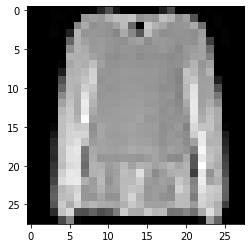

Image 18 : Class is  Shirt class id= 6


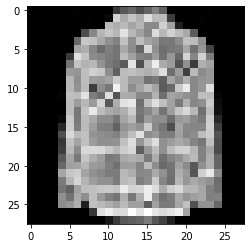

Image 32 : Class is  Shirt class id= 6


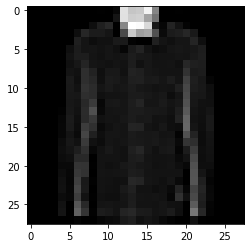

Image 33 : Class is  Shirt class id= 6


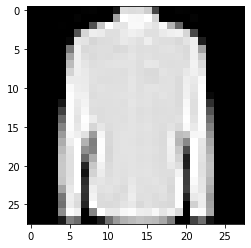

Image 39 : Class is  Shirt class id= 6


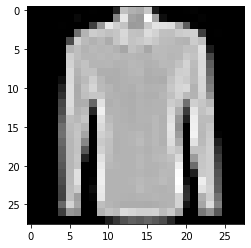

Image 40 : Class is  Shirt class id= 6


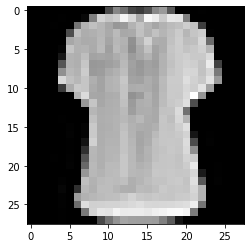

Image 55 : Class is  Shirt class id= 6


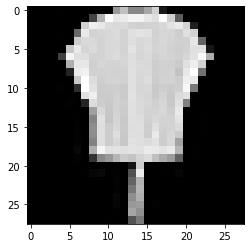

Image 56 : Class is  Shirt class id= 6


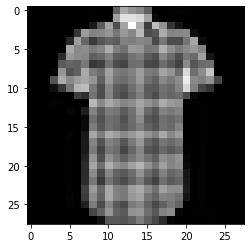

Image 72 : Class is  Shirt class id= 6


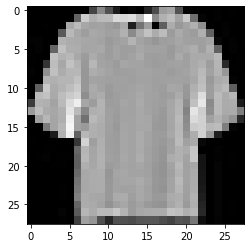

Image 77 : Class is  Shirt class id= 6


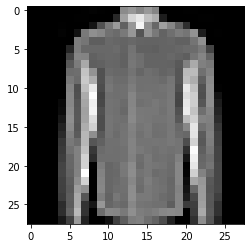

Image 95 : Class is  Shirt class id= 6


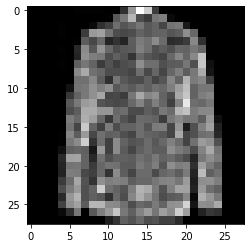

Image 104 : Class is  Shirt class id= 6


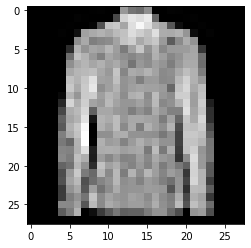

Image 112 : Class is  Shirt class id= 6


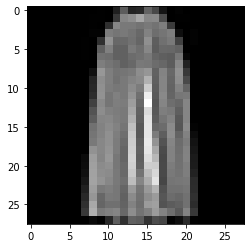

Image 113 : Class is  Shirt class id= 6


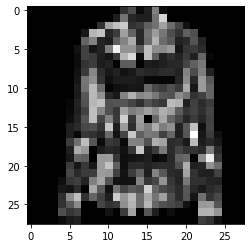

Image 118 : Class is  Shirt class id= 6


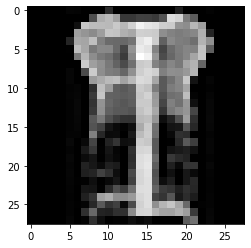

Image 127 : Class is  Shirt class id= 6


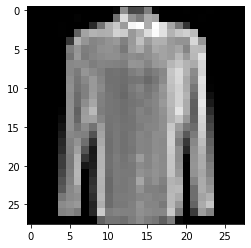

Image 140 : Class is  Shirt class id= 6


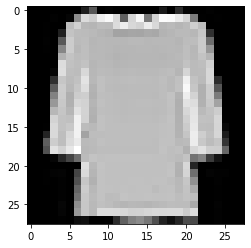

Image 157 : Class is  Shirt class id= 6


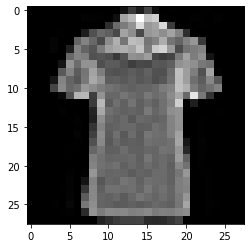

Image 164 : Class is  Shirt class id= 6


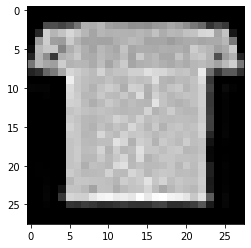

Image 168 : Class is  Shirt class id= 6


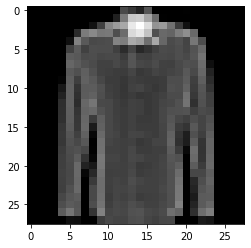

Image 183 : Class is  Shirt class id= 6


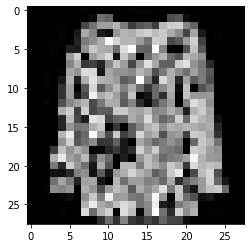

Image 184 : Class is  Shirt class id= 6


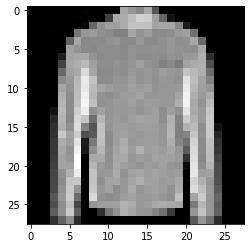

Image 203 : Class is  Shirt class id= 6


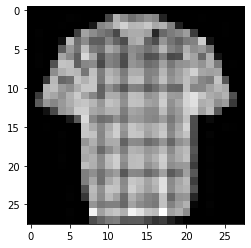

Image 206 : Class is  Shirt class id= 6


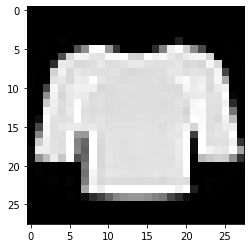

Image 226 : Class is  Shirt class id= 6


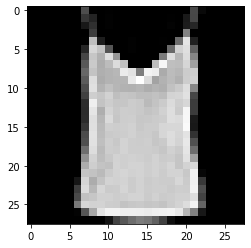

Image 232 : Class is  Shirt class id= 6
None


In [62]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

list_6 = find_indices(train_labels, 6)
len(list_6)
print(visuals(list_6))

In [63]:
list_2 = find_indices(train_labels, 2)
len(list_2)

6000

In [64]:
combined_list = list_2 + list_6
len(combined_list)

12000

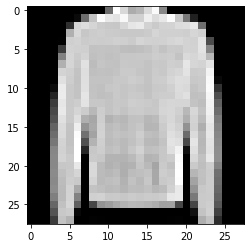

Image 45547 : Class is  Pullover class id= 2


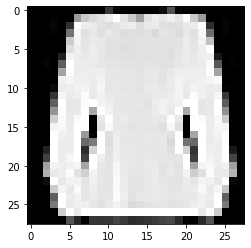

Image 57551 : Class is  Shirt class id= 6


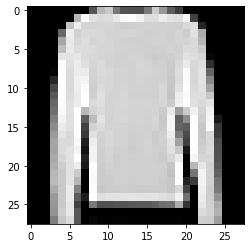

Image 56314 : Class is  Pullover class id= 2


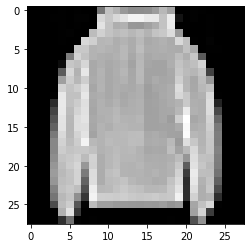

Image 11758 : Class is  Pullover class id= 2


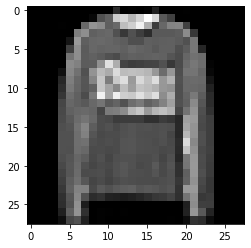

Image 36151 : Class is  Pullover class id= 2


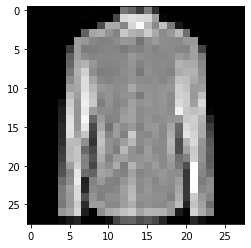

Image 36256 : Class is  Shirt class id= 6


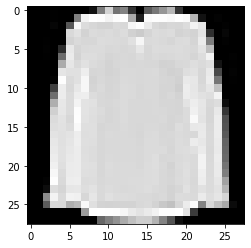

Image 47371 : Class is  Shirt class id= 6


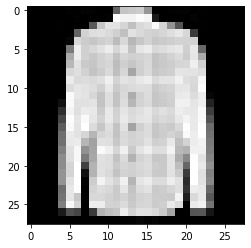

Image 57123 : Class is  Shirt class id= 6


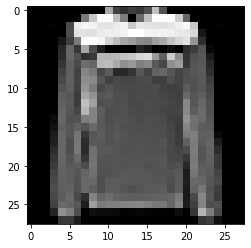

Image 16888 : Class is  Pullover class id= 2


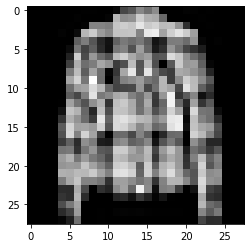

Image 361 : Class is  Shirt class id= 6


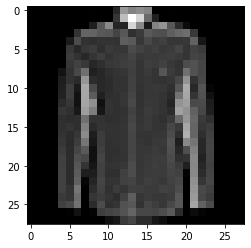

Image 19129 : Class is  Shirt class id= 6


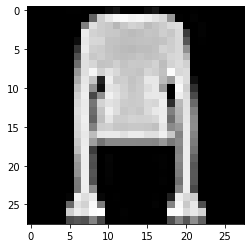

Image 50582 : Class is  Pullover class id= 2


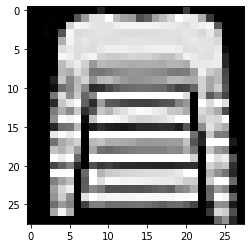

Image 39025 : Class is  Pullover class id= 2


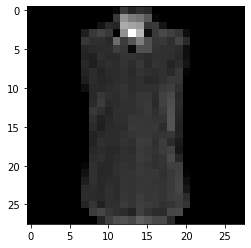

Image 18943 : Class is  Shirt class id= 6


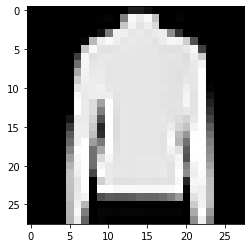

Image 4396 : Class is  Pullover class id= 2


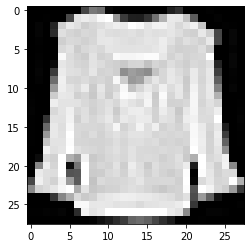

Image 55290 : Class is  Shirt class id= 6


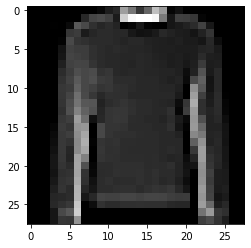

Image 18811 : Class is  Pullover class id= 2


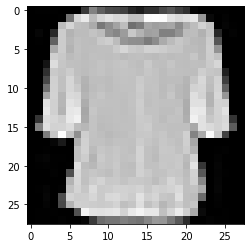

Image 44458 : Class is  Shirt class id= 6


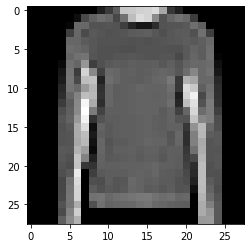

Image 36577 : Class is  Pullover class id= 2


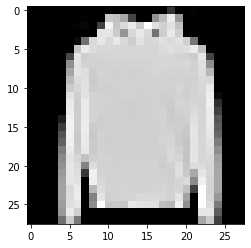

Image 43886 : Class is  Pullover class id= 2


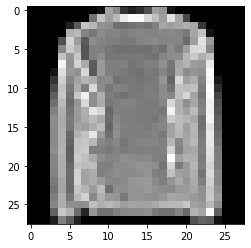

Image 11360 : Class is  Pullover class id= 2


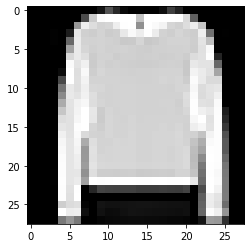

Image 52505 : Class is  Pullover class id= 2


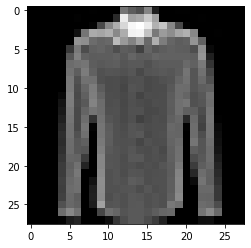

Image 49264 : Class is  Shirt class id= 6


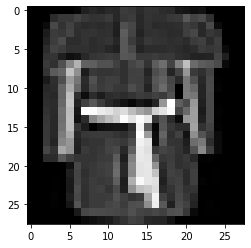

Image 49733 : Class is  Shirt class id= 6


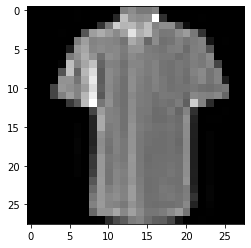

Image 45048 : Class is  Shirt class id= 6


In [65]:
import random
random.shuffle(combined_list)

visuals(combined_list)

In [66]:
index = np.isin(train_labels, [2, 6])

train_labels = train_labels[index]
train_imgs = train_imgs[index]

train_labels[train_labels == 2] = 0
train_labels[train_labels == 6] = 1

In [67]:
# This function taken directly from the Fashion-MNIST github site: 
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='t10k'): 
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. 
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. 
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9. 
#             The number at index i indicates the label of the ith image in the array data.

In [68]:
(test_imgs, test_labels) = load_mnist(r'', 't10k')

In [69]:
test_imgs.shape

(10000, 784)

In [70]:
# label_names = ['Pullover', 'Shirt']
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [71]:
print(f"Shape of images is {test_imgs.shape}, labels is {test_labels.shape}")

Shape of images is (10000, 784), labels is (10000,)


In [72]:
new_test_labels = test_labels[(test_labels == 2) | (test_labels == 6)]
new_test_labels.shape

(2000,)

In [73]:
def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]
    
    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28) 
    
    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()

In [74]:
def visuals(filter_list, limit=25):    
    count = 0
    for a in filter_list:
        visualise(test_imgs, a)
        print("Image", a,": Class is ", label_names[test_labels[a]], "class id=", test_labels[a])
        count+=1
        if count == limit:
            break

In [75]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

t_list_6 = find_indices(test_labels, 6)
len(t_list_6)
#print(list_6)

1000

In [76]:
t_list_2 = find_indices(test_labels, 2)
len(t_list_2)
#print(visuals(t_list_2))

1000

In [77]:
t_combined_list = t_list_2 + t_list_6
len(t_combined_list)

2000

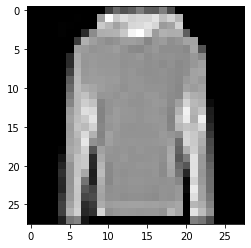

Image 4562 : Class is  Pullover class id= 2


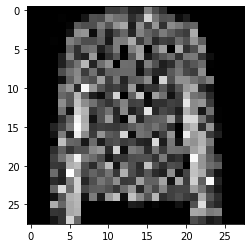

Image 562 : Class is  Shirt class id= 6


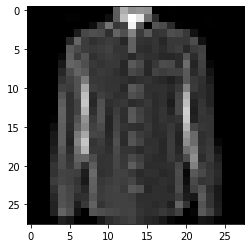

Image 7430 : Class is  Shirt class id= 6


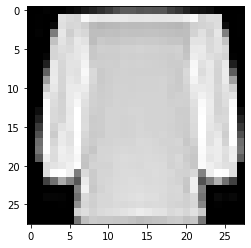

Image 4595 : Class is  Shirt class id= 6


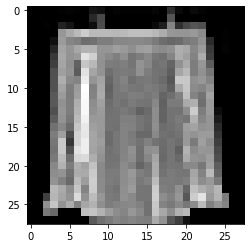

Image 8622 : Class is  Shirt class id= 6


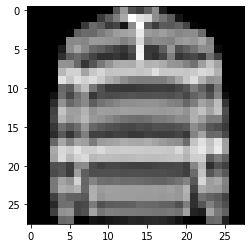

Image 2503 : Class is  Pullover class id= 2


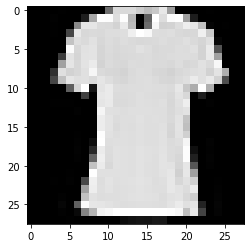

Image 4803 : Class is  Shirt class id= 6


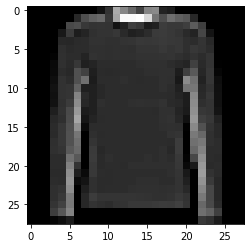

Image 5805 : Class is  Pullover class id= 2


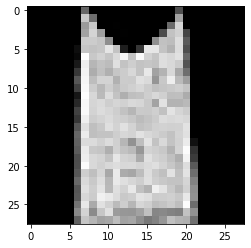

Image 6159 : Class is  Shirt class id= 6


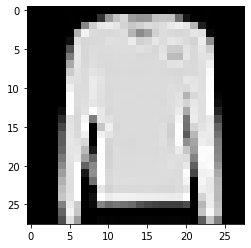

Image 8362 : Class is  Pullover class id= 2


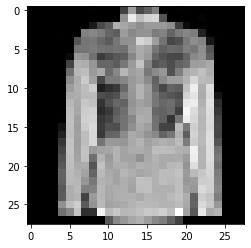

Image 5874 : Class is  Shirt class id= 6


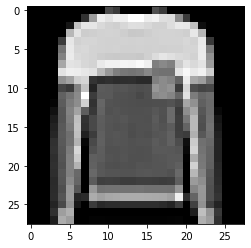

Image 7390 : Class is  Pullover class id= 2


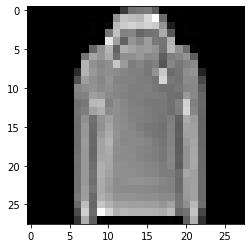

Image 5159 : Class is  Pullover class id= 2


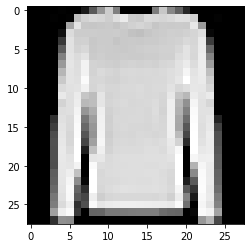

Image 5535 : Class is  Pullover class id= 2


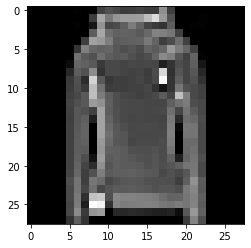

Image 6346 : Class is  Pullover class id= 2


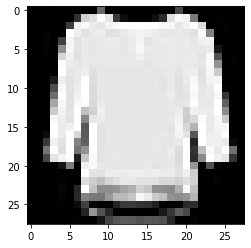

Image 1515 : Class is  Shirt class id= 6


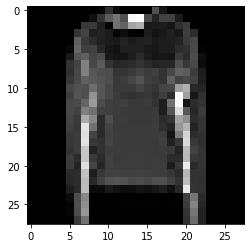

Image 1576 : Class is  Pullover class id= 2


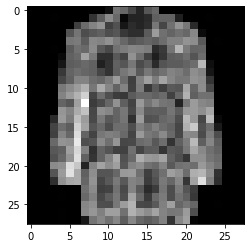

Image 3959 : Class is  Shirt class id= 6


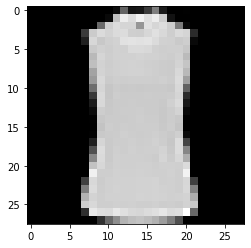

Image 6169 : Class is  Shirt class id= 6


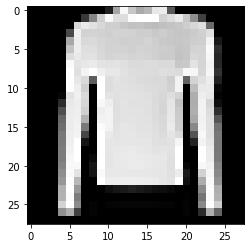

Image 497 : Class is  Pullover class id= 2


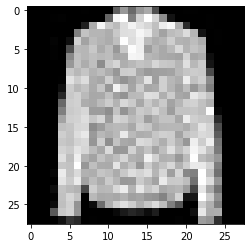

Image 2694 : Class is  Shirt class id= 6


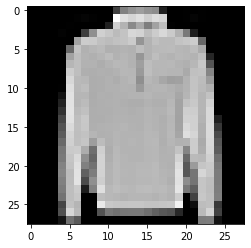

Image 3534 : Class is  Pullover class id= 2


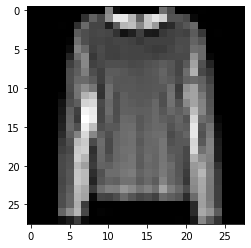

Image 4223 : Class is  Pullover class id= 2


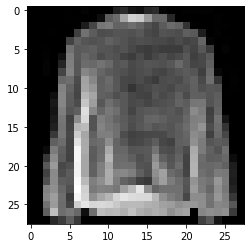

Image 8774 : Class is  Pullover class id= 2


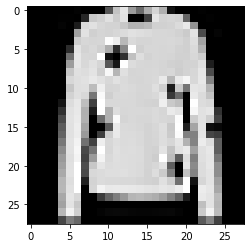

Image 8676 : Class is  Pullover class id= 2


In [78]:
import random
random.shuffle(t_combined_list)

visuals(t_combined_list)

In [79]:
index = np.isin(test_labels, [2, 6])

test_labels = test_labels[index]
test_imgs = test_imgs[index]

test_labels[test_labels == 2] = 0
test_labels[test_labels == 6] = 1


In [80]:
len(test_labels)

2000

In [81]:
X_train = train_imgs
y_train = train_labels
X_test = test_imgs[:1000]
y_test = test_labels[:1000]
X_val = test_imgs[1001:]
y_val = test_labels[1001:]

In [82]:
nn = ShallowNeuralNetwork(784, 392, 1)

In [83]:
nn.train(X_train, y_train, X_val, y_val, 50, 0.001)

Epoch:  0 Error:  0.6216216216216216
Epoch:  1 Error:  0.6896896896896897
Epoch:  2 Error:  0.7007007007007007
Epoch:  3 Error:  0.7247247247247247
Epoch:  4 Error:  0.7437437437437437
Epoch:  5 Error:  0.7447447447447447
Epoch:  6 Error:  0.7567567567567568
Epoch:  7 Error:  0.7547547547547547
Epoch:  8 Error:  0.7517517517517518
Epoch:  9 Error:  0.7597597597597597
Epoch:  10 Error:  0.7517517517517518
Epoch:  11 Error:  0.7587587587587588
Epoch:  12 Error:  0.7437437437437437
Epoch:  13 Error:  0.7517517517517518
Epoch:  14 Error:  0.7327327327327328
Epoch:  15 Error:  0.7347347347347347
Epoch:  16 Error:  0.7127127127127127
Epoch:  17 Error:  0.7027027027027027
Epoch:  18 Error:  0.6896896896896897
Epoch:  19 Error:  0.6906906906906907
Epoch:  20 Error:  0.6896896896896897
Epoch:  21 Error:  0.6996996996996997
Epoch:  22 Error:  0.6916916916916916
Epoch:  23 Error:  0.7057057057057057
Epoch:  24 Error:  0.6946946946946947
Epoch:  25 Error:  0.7097097097097097
Epoch:  26 Error:  0.6

In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, nn.predict(X_test).T)

0.782

# Part 4 – Explanation
1: Code to read in the big dataset, and sample subsets for training, validation and testing.


1: Train the NN, tune on the validation set if required, and test on the test set.


1: Present results and make observations on your testing.



# Part 5: Deep Learning Enhancements


In [85]:
# MULTI LAYER PERCEPTRON - DONE BY ADITI VILAS SONKUSARE
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [86]:
import numpy as np

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5 # Step 1

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T.reshape(self.input.T.shape[0], 1), output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [87]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [88]:
import numpy as np

# activation function and its derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

In [89]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

In [90]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.val_acc = []

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return np.abs(np.round(result))

    # train the network
    def fit(self, x_train, y_train, X_val, y_val, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
            
            pred = np.asarray(net.predict(X_val))
            pred = pred.reshape(pred.shape[0])
            val= accuracy_score(pred, y_val)
            if i > 0:
                if val < self.val_acc[-1]:
                    print("early stopping at epoch", i+1)
                    break
            self.val_acc.append(val)
            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f  val accuracy: %f' % (i+1, epochs, err, val))

In [91]:
net = Network()
net.add(FCLayer(784, 392))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(392, 1))
net.add(ActivationLayer(tanh, tanh_prime))

In [92]:
net.use(mse, mse_prime)
net.fit(X_train, y_train,X_val, y_val , 5, 0.0000001)

epoch 1/5   error=0.857805  val accuracy: 0.522523
early stopping at epoch 2


In [93]:
pred = np.asarray(net.predict(X_test))
pred = pred.reshape(pred.shape[0])

In [94]:
accuracy_score(pred, y_test)

0.479